# Analysis of European Soccer Database

Erick Herrera, Hyejeong Kim, Kibreab Gebrehiwot

## Introduction

The data we are analyzing is based on the European fútball 2008-2016 seasons. This dataset is comprised of the information on 11 different European fútball league and thier teams. Specifically, the data contains 7 tables (Country, League, Player, player attributes, team, team attributes, and all the matches played during 2008 - 2016 seasons. The goal is to some insight on the beautiful game based on the data held by this dataset. 

^ Exploratory analysis & Data visualization
1. which team had highest goal per league and per year? hj = done
2. which team won the most per league and per year?hj = done
3. Comparing attributes of the two teams among most successful team of each league. hj = done
4. goal vs home or away / win vs home or away hj = done

5. Is there a relationship between player attributes and their overall_rating? = done eh
6. which player has highest overall_rating per year? = done eh

7. perferred foot(right vs left)  = done kb
8. winning percentage per number of goal = done kb

^ Analysis

** overall_rating(player) as dependent and other features for independent(linear regression) = done - need comment eh
** winning percentage(team) as dependent and other features for independent(linear regression) = HJ
** winner(team) as dependent for overall_rating of each player in the team as independent(logistic regression) = done -> KB add away data, for each league -> fix the error


# Collect Data

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import sqlite3
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [2]:
sqlite_file = 'database.sqlite'

In [3]:
conn = sqlite3.connect(sqlite_file)    # connect to the database 

In [4]:
query = "SELECT * FROM Country"        # get the Country table 
countries = pd.read_sql(query, conn)
countries.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [5]:
countries.shape

(11, 2)

In [6]:
query = "SELECT * FROM League"              # get the league table 
leagues = pd.read_sql(query, conn)
leagues.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [7]:
leagues.shape

(11, 3)

In [8]:
query = "SELECT * FROM Match"                     # get the Match table 
matches = pd.read_sql(query, conn)
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [9]:
matches_copy= matches.copy()

In [10]:
matches.shape

(25979, 115)

In [11]:
my_list = list(matches)                      # getting the whole column names from match table 
my_list = matches.columns.values.tolist()
#my_list

In [12]:
query = "SELECT * FROM Player"              # getting the payers table 
players = pd.read_sql(query, conn)
players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [13]:
players.shape

(11060, 7)

In [14]:
players.columns

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')

In [15]:
query = "SELECT * FROM Player_Attributes"           #getting the player_attributes table
player_Attributes = pd.read_sql(query, conn)
player_Attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [16]:
player_Attributes.shape

(183978, 42)

In [17]:
player_Attributes.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [18]:
query = "SELECT * FROM Team"                # getting the team table 
teams = pd.read_sql(query, conn)
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [19]:
teams.shape

(299, 5)

In [20]:
query = "SELECT * FROM Team_Attributes"                  # getting the Team_Attributs table 
team_Attributes = pd.read_sql(query, conn)
team_Attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [21]:
team_Attributes.shape

(1458, 25)

In [22]:
team_Attributes.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

# Data Processing

In [23]:
cursor = conn.cursor()

### Cleaning Country and League Table and Create countryLeague table

In [24]:
result = cursor.execute("""SELECT Country.id, Country.name, League.name FROM Country INNER JOIN
League ON Country.ID = League.ID""")

In [25]:
countryLeague = pd.DataFrame(result.fetchall())
countryLeague.columns = ['id', 'countryName', 'leagueName']
countryLeague.head()

,id,countryName,leagueName
0,1,Belgium,Belgium Jupiler League
1,1729,England,England Premier League
2,4769,France,France Ligue 1
3,7809,Germany,Germany 1. Bundesliga
4,10257,Italy,Italy Serie A


### Cleaning Matches Table
Remove null columns and split season column to season_start and season_end.
Matches and countryLeague merged to matchCountry table 

In [26]:
matches.dropna(axis = 1, inplace = True)
matches.isnull().values.any()

False

In [27]:
matches['date'] = pd.to_datetime(matches['date'])
matches.dtypes

id                           int64
country_id                   int64
league_id                    int64
season                      object
stage                        int64
date                datetime64[ns]
match_api_id                 int64
home_team_api_id             int64
away_team_api_id             int64
home_team_goal               int64
away_team_goal               int64
dtype: object

In [28]:
matches['season_start'] = matches['season'].apply(lambda x: x.split('/')[0])
matches['season_end'] = matches['season'].apply(lambda x: x.split('/')[1])
matches.drop(columns = ['season'], axis = 1, inplace = True)

In [29]:
matchCountry = matches.merge(countryLeague, left_on = 'country_id', right_on = 'id')
matchCountry.drop(columns = ['league_id', 'id_y'], axis = 1, inplace = True)
matchCountry = matchCountry.rename(columns={"id_x": "id", "country_id": "country_league_id"})
matchCountry.head()

,id,country_league_id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season_start,season_end,countryName,leagueName
0,1,1,1,2008-08-17,492473,9987,9993,1,1,2008,2009,Belgium,Belgium Jupiler League
1,2,1,1,2008-08-16,492474,10000,9994,0,0,2008,2009,Belgium,Belgium Jupiler League
2,3,1,1,2008-08-16,492475,9984,8635,0,3,2008,2009,Belgium,Belgium Jupiler League
3,4,1,1,2008-08-17,492476,9991,9998,5,0,2008,2009,Belgium,Belgium Jupiler League
4,5,1,1,2008-08-16,492477,7947,9985,1,3,2008,2009,Belgium,Belgium Jupiler League


### Cleaning Player and Player_Attributes and merge to player_attribute

In [30]:
players['birthday'] = pd.to_datetime(players['birthday'])

In [31]:
player_Attributes['date'] = pd.to_datetime(player_Attributes['date'])

In [32]:
player_attribute = players.merge(player_Attributes, left_on = 'player_api_id', right_on = 'player_api_id')
player_attribute.drop(columns = ['id_y', 'player_fifa_api_id_y'], axis = 1, inplace = True)
player_attribute = player_attribute.rename(columns={"id_x": "id", "player_fifa_api_id_x": "player_fifa_api_id"})
player_attribute.shape
player_Attributes.shape

(183978, 42)

### Cleaning Team, Match and Team_Attributes
#### 1. Team and Matches merged to team_match table and added winner column 

In [33]:
team_Attributes['date'] = pd.to_datetime(team_Attributes['date'])

In [34]:
team_match = matchCountry.merge(teams, left_on = 'home_team_api_id', right_on = 'team_api_id')
team_match = team_match.rename(columns={"id_x": "id", "team_long_name": "home_team", "team_fifa_api_id": "home_team_fifa_api_id"})
team_match['home_team'] =  team_match['home_team'] + " (" + team_match['team_short_name'] + ")"
team_match.drop(columns = ['id_y', 'team_api_id', 'team_short_name'], axis = 1, inplace = True)

team_match = team_match.merge(teams, left_on = 'away_team_api_id', right_on = 'team_api_id')
team_match = team_match.rename(columns={"id_x": "id", "team_long_name": "away_team", "team_fifa_api_id": "away_team_fifa_api_id"})
team_match['away_team'] =  team_match['away_team'] + " (" + team_match['team_short_name'] + ")"
team_match.drop(columns = ['id_y', 'team_api_id', 'team_short_name'], axis = 1, inplace = True)
team_match.head()

,id,country_league_id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season_start,season_end,countryName,leagueName,home_team_fifa_api_id,home_team,away_team_fifa_api_id,away_team
0,1,1,1,2008-08-17,492473,9987,9993,1,1,2008,2009,Belgium,Belgium Jupiler League,673.0,KRC Genk (GEN),675.0,Beerschot AC (BAC)
1,483,1,5,2009-08-30,665353,9987,9993,1,1,2009,2010,Belgium,Belgium Jupiler League,673.0,KRC Genk (GEN),675.0,Beerschot AC (BAC)
2,524,1,1,2010-08-01,838476,9987,9993,2,1,2010,2011,Belgium,Belgium Jupiler League,673.0,KRC Genk (GEN),675.0,Beerschot AC (BAC)
3,759,1,1,2011-07-30,1032694,9987,9993,3,1,2011,2012,Belgium,Belgium Jupiler League,673.0,KRC Genk (GEN),675.0,Beerschot AC (BAC)
4,1014,1,11,2012-10-20,1224064,9987,9993,3,0,2012,2013,Belgium,Belgium Jupiler League,673.0,KRC Genk (GEN),675.0,Beerschot AC (BAC)


In [35]:
team_match.columns
team_match = team_match[['id', 'match_api_id', 'date', 'home_team', 'home_team_api_id', 'home_team_fifa_api_id', 
                         'home_team_goal', 'away_team', 'away_team_api_id', 'away_team_fifa_api_id', 'away_team_goal', 
                         'country_league_id', 'stage', 'season_start', 'season_end', 'countryName', 'leagueName']]
team_match.head()

,id,match_api_id,date,home_team,home_team_api_id,home_team_fifa_api_id,home_team_goal,away_team,away_team_api_id,away_team_fifa_api_id,away_team_goal,country_league_id,stage,season_start,season_end,countryName,leagueName
0,1,492473,2008-08-17,KRC Genk (GEN),9987,673.0,1,Beerschot AC (BAC),9993,675.0,1,1,1,2008,2009,Belgium,Belgium Jupiler League
1,483,665353,2009-08-30,KRC Genk (GEN),9987,673.0,1,Beerschot AC (BAC),9993,675.0,1,1,5,2009,2010,Belgium,Belgium Jupiler League
2,524,838476,2010-08-01,KRC Genk (GEN),9987,673.0,2,Beerschot AC (BAC),9993,675.0,1,1,1,2010,2011,Belgium,Belgium Jupiler League
3,759,1032694,2011-07-30,KRC Genk (GEN),9987,673.0,3,Beerschot AC (BAC),9993,675.0,1,1,1,2011,2012,Belgium,Belgium Jupiler League
4,1014,1224064,2012-10-20,KRC Genk (GEN),9987,673.0,3,Beerschot AC (BAC),9993,675.0,0,1,11,2012,2013,Belgium,Belgium Jupiler League


In [36]:
winner = []
for index, row in team_match.iterrows():
    if team_match.iloc[index, 6] > team_match.iloc[index, 10]:
        winner.append(team_match.iloc[index, 3])
    elif team_match.iloc[index, 6] < team_match.iloc[index, 10]:
        winner.append(team_match.iloc[index, 7])
    else:
        winner.append("Tie")
team_match['winner'] = winner 

In [37]:
team_match.drop(columns = ['home_team_fifa_api_id', 'away_team_fifa_api_id'], axis = 1, inplace = True)
team_match.head()

,id,match_api_id,date,home_team,home_team_api_id,home_team_goal,away_team,away_team_api_id,away_team_goal,country_league_id,stage,season_start,season_end,countryName,leagueName,winner
0,1,492473,2008-08-17,KRC Genk (GEN),9987,1,Beerschot AC (BAC),9993,1,1,1,2008,2009,Belgium,Belgium Jupiler League,Tie
1,483,665353,2009-08-30,KRC Genk (GEN),9987,1,Beerschot AC (BAC),9993,1,1,5,2009,2010,Belgium,Belgium Jupiler League,Tie
2,524,838476,2010-08-01,KRC Genk (GEN),9987,2,Beerschot AC (BAC),9993,1,1,1,2010,2011,Belgium,Belgium Jupiler League,KRC Genk (GEN)
3,759,1032694,2011-07-30,KRC Genk (GEN),9987,3,Beerschot AC (BAC),9993,1,1,1,2011,2012,Belgium,Belgium Jupiler League,KRC Genk (GEN)
4,1014,1224064,2012-10-20,KRC Genk (GEN),9987,3,Beerschot AC (BAC),9993,0,1,11,2012,2013,Belgium,Belgium Jupiler League,KRC Genk (GEN)


#### 2. Team and Team_Attribute merged to team_attribute

In [38]:
team_attribute = team_Attributes.merge(teams, left_on = 'team_api_id', right_on = 'team_api_id')
team_attribute = team_attribute.rename(columns={"id_x": "id", "team_long_name": "team_name", "team_fifa_api_id_x": "team_fifa_api_id"})
team_attribute['team_name'] =  team_attribute['team_name'] + " (" + team_attribute['team_short_name'] + ")"
team_attribute.drop(columns = ['id_y', 'team_fifa_api_id_y', 'team_short_name'], axis = 1, inplace = True)
team_attribute.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_name
0,1,434,9930,2010-02-22,60,Balanced,NaN,Little,50,Mixed,...,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau (AAR)
1,2,434,9930,2014-09-19,52,Balanced,48.0,Normal,56,Mixed,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau (AAR)
2,3,434,9930,2015-09-10,47,Balanced,41.0,Normal,54,Mixed,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau (AAR)
3,4,77,8485,2010-02-22,70,Fast,NaN,Little,70,Long,...,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen (ABE)
4,5,77,8485,2011-02-22,47,Balanced,NaN,Little,52,Mixed,...,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen (ABE)


In [39]:
team_attribute.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass', 'defenceDefenderLineClass',
       'team_name'],
      dtype='object')

In [40]:
cols = list(team_attribute.columns)
cols = [cols[0]] + [cols[-1]] + cols[1:-1]

In [41]:
team_attribute = team_attribute[cols]
team_attribute.sort_values(by='team_name', ascending=False)
team_attribute.head()

,id,team_name,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,FC Aarau (AAR),434,9930,2010-02-22,60,Balanced,NaN,Little,50,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,FC Aarau (AAR),434,9930,2014-09-19,52,Balanced,48.0,Normal,56,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,FC Aarau (AAR),434,9930,2015-09-10,47,Balanced,41.0,Normal,54,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,Aberdeen (ABE),77,8485,2010-02-22,70,Fast,NaN,Little,70,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,Aberdeen (ABE),77,8485,2011-02-22,47,Balanced,NaN,Little,52,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


# Exploratory analysis & Data visualization

## 1. which team had highest goal per league and per season?

In [42]:
pd.set_option('mode.chained_assignment', None)

In [43]:
df = team_match[['season_start', 'home_team', 'home_team_goal', 'away_team', 'away_team_goal', 'leagueName']]
df.head()

,season_start,home_team,home_team_goal,away_team,away_team_goal,leagueName
0,2008,KRC Genk (GEN),1,Beerschot AC (BAC),1,Belgium Jupiler League
1,2009,KRC Genk (GEN),1,Beerschot AC (BAC),1,Belgium Jupiler League
2,2010,KRC Genk (GEN),2,Beerschot AC (BAC),1,Belgium Jupiler League
3,2011,KRC Genk (GEN),3,Beerschot AC (BAC),1,Belgium Jupiler League
4,2012,KRC Genk (GEN),3,Beerschot AC (BAC),0,Belgium Jupiler League


In [44]:
df['season_start'] = df['season_start'].astype(int)

In [45]:
num_goal_home = df.groupby(['leagueName', 'season_start', 'home_team']).sum()
num_goal_home.drop(columns = ['away_team_goal'], axis = 1, inplace = True)
num_goal_home.head()

home_team_goal
leagueName             season_start home_team                           
Belgium Jupiler League 2008         Beerschot AC (BAC)                32
                                    Club Brugge KV (CLB)              37
                                    FCV Dender EH (DEN)               21
                                    KAA Gent (GEN)                    31
                                    KRC Genk (GEN)                    23

In [46]:
num_goal_away = df.groupby(['leagueName', 'season_start', 'away_team']).sum()
num_goal_away.drop(columns = ['home_team_goal'], axis = 1, inplace = True)
num_goal_away.head()

away_team_goal
leagueName             season_start away_team                           
Belgium Jupiler League 2008         Beerschot AC (BAC)                12
                                    Club Brugge KV (CLB)              22
                                    FCV Dender EH (DEN)               23
                                    KAA Gent (GEN)                    36
                                    KRC Genk (GEN)                    25

In [47]:
num_goal = num_goal_home.merge(num_goal_away, left_index=True, right_on=['leagueName', 'season_start', 'away_team'])
num_goal['total_num_goal'] = num_goal['home_team_goal'] + num_goal['away_team_goal']
num_goal

home_team_goal  \
leagueName               season_start away_team                                       
Belgium Jupiler League   2008         Beerschot AC (BAC)                         32   
                                      Club Brugge KV (CLB)                       37   
                                      FCV Dender EH (DEN)                        21   
                                      KAA Gent (GEN)                             31   
                                      KRC Genk (GEN)                             23   
...                                                                             ...   
Switzerland Super League 2015         FC Thun (THU)                              26   
                                      FC Vaduz (VAD)                             20   
                                      FC Zürich (ZUR)                            29   
                                      Grasshopper Club Zürich (GRA)              35   
                                      Lugano (LUG)                               25   

                                                                     away_team_goal  \
leagueName               season_start away_team                                       
Belgium Jupiler League   2008         Beerschot AC (BAC)                         12   
                                      Club Brugge KV (CLB)                       22   
                                      FCV Dender EH (DEN)                        23   
                                      KAA Gent (GEN)                             36   
                                      KRC Genk (GEN)                             25   
...                                                                             ...   
Switzerland Super League 2015         FC Thun (THU)                              19   
                                      FC Vaduz (VAD)                             24   
                                      FC Zürich (ZUR)                            19   
                                      Grasshopper Club Zürich (GRA)              30   
                                      Lugano (LUG)                               21   

                                                                     total_num_goal  
leagueName               season_start away_team                                      
Belgium Jupiler League   2008         Beerschot AC (BAC)                         44  
                                      Club Brugge KV (CLB)                       59  
                                      FCV Dender EH (DEN)                        44  
                                      KAA Gent (GEN)                             67  
                                      KRC Genk (GEN)                             48  
...                                                                             ...  
Switzerland Super League 2015         FC Thun (THU)                              45  
                                      FC Vaduz (VAD)                             44  
                                      FC Zürich (ZUR)                            48  
                                      Grasshopper Club Zürich (GRA)              65  
                                      Lugano (LUG)                               46  

[1481 rows x 3 columns]

In [48]:
A = num_goal # A is for later use

In [49]:
num_goal.reset_index(inplace=True)  
num_goal_highest = num_goal.loc[num_goal.groupby(["leagueName", "season_start"])["total_num_goal"].idxmax()]

In [50]:
num_goal_highest = num_goal_highest.rename(columns={"away_team": "team_name"})
num_goal_highest.drop(columns = ['home_team_goal', 'away_team_goal'], axis = 1, inplace = True)
num_goal_highest.reset_index(drop=False, inplace=True)
num_goal_highest

,index,leagueName,season_start,team_name,total_num_goal
0,11,Belgium Jupiler League,2008,RSC Anderlecht (AND),75
1,27,Belgium Jupiler League,2009,RSC Anderlecht (AND),62
2,37,Belgium Jupiler League,2010,KRC Genk (GEN),64
3,51,Belgium Jupiler League,2011,KAA Gent (GEN),63
4,75,Belgium Jupiler League,2012,RSC Anderlecht (AND),69
...,...,...,...,...,...
83,1432,Switzerland Super League,2011,FC Basel (BAS),78
84,1448,Switzerland Super League,2012,FC Zürich (ZUR),62
85,1453,Switzerland Super League,2013,FC Basel (BAS),70
86,1463,Switzerland Super League,2014,FC Basel (BAS),84


In [51]:
for i, row in num_goal_highest.iterrows():
    num_goal_highest.iloc[i, 2] = str(num_goal_highest.iloc[i, 2]) + " - " + str(num_goal_highest.iloc[i, 2] + 1)

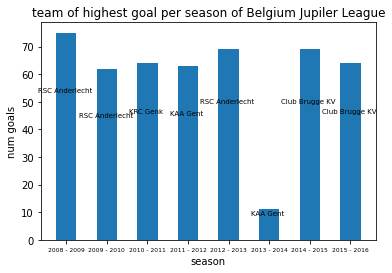

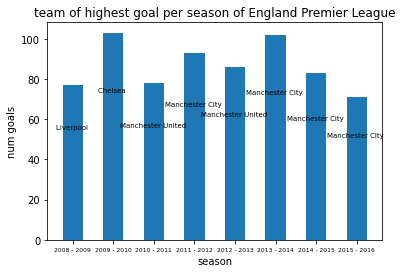

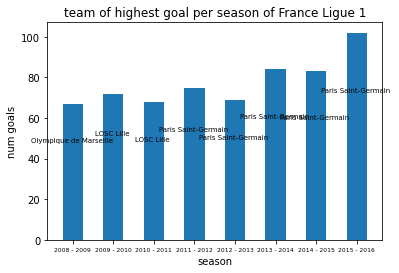

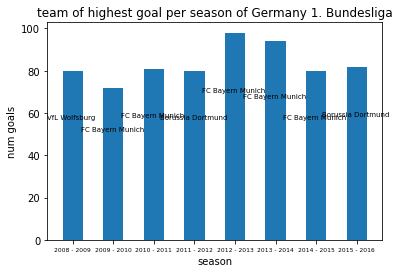

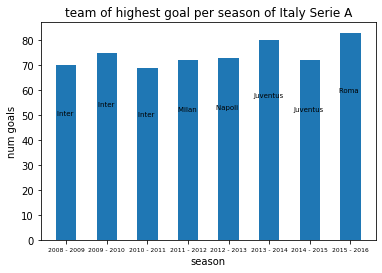

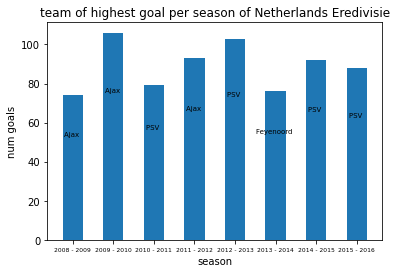

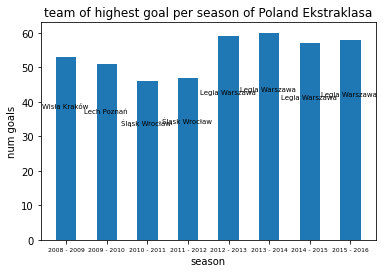

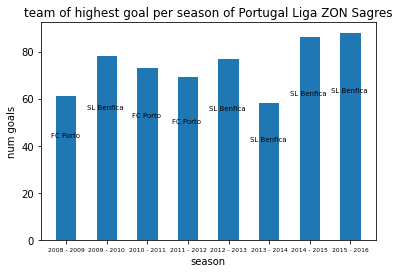

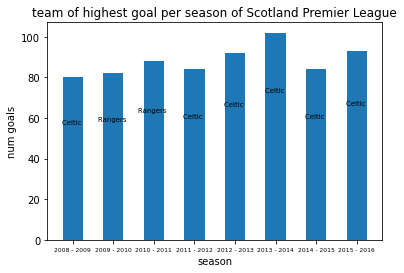

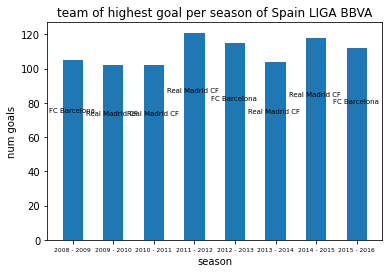

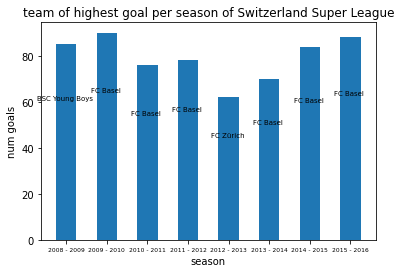

In [52]:
%matplotlib inline

leagues = num_goal_highest.leagueName.unique()
count = 0
for league in leagues:
    new_df = num_goal_highest[num_goal_highest['leagueName'] == league]
    labels = new_df.season_start
    x = np.arange(len(labels))
    goals = new_df.total_num_goal
    width = 0.5
    fig, ax = plt.subplots()
    rects = ax.bar(x , goals, width)
    ax.set_ylabel('num goals')
    ax.set_xlabel('season')
    ax.set_title("team of highest goal per season of " + league)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=6)


    teams_label = new_df.team_name
    for rect in rects:
        team_name = teams_label[count].split("(")[0]
        height = rect.get_height() +1
        ax.text(rect.get_x() + width*0.5, 0.7*height, team_name,
                    ha='center', va='bottom', fontsize=7)
        count = count +1
    plt.show()


## 2. which team won the most per league and per year?

In [53]:
team_match.head()

,id,match_api_id,date,home_team,home_team_api_id,home_team_goal,away_team,away_team_api_id,away_team_goal,country_league_id,stage,season_start,season_end,countryName,leagueName,winner
0,1,492473,2008-08-17,KRC Genk (GEN),9987,1,Beerschot AC (BAC),9993,1,1,1,2008,2009,Belgium,Belgium Jupiler League,Tie
1,483,665353,2009-08-30,KRC Genk (GEN),9987,1,Beerschot AC (BAC),9993,1,1,5,2009,2010,Belgium,Belgium Jupiler League,Tie
2,524,838476,2010-08-01,KRC Genk (GEN),9987,2,Beerschot AC (BAC),9993,1,1,1,2010,2011,Belgium,Belgium Jupiler League,KRC Genk (GEN)
3,759,1032694,2011-07-30,KRC Genk (GEN),9987,3,Beerschot AC (BAC),9993,1,1,1,2011,2012,Belgium,Belgium Jupiler League,KRC Genk (GEN)
4,1014,1224064,2012-10-20,KRC Genk (GEN),9987,3,Beerschot AC (BAC),9993,0,1,11,2012,2013,Belgium,Belgium Jupiler League,KRC Genk (GEN)


In [54]:
df = team_match[team_match['winner'] != 'Tie']

In [55]:
df = df[['leagueName', 'season_start', 'winner']]
df['season_start'] = df['season_start'].astype(int)
df.head()

,leagueName,season_start,winner
2,Belgium Jupiler League,2010,KRC Genk (GEN)
3,Belgium Jupiler League,2011,KRC Genk (GEN)
4,Belgium Jupiler League,2012,KRC Genk (GEN)
6,Belgium Jupiler League,2009,SV Zulte-Waregem (ZUL)
7,Belgium Jupiler League,2010,SV Zulte-Waregem (ZUL)


In [56]:
most_wins = df.groupby(['leagueName', 'season_start', 'winner'])['winner'].count().sort_values(ascending=False)
print(type(most_wins))
most_wins

<class 'pandas.core.series.Series'>


leagueName               season_start  winner                
Italy Serie A            2013          Juventus (JUV)            33
Spain LIGA BBVA          2011          Real Madrid CF (REA)      32
                         2012          FC Barcelona (BAR)        32
Scotland Premier League  2013          Celtic (CEL)              31
Spain LIGA BBVA          2009          FC Barcelona (BAR)        31
                                                                 ..
                         2014          Córdoba CF (COR)           3
France Ligue 1           2010          AC Arles-Avignon (ARL)     3
Netherlands Eredivisie   2010          Willem II (WII)            3
Belgium Jupiler League   2013          Lierse SK (LIE)            2
                                       Waasland-Beveren (WAA)     1
Name: winner, Length: 1481, dtype: int64

In [57]:
leagues = []
seasons = []
teams = []
count_wins = []
for index, value in most_wins.items():
    leagues.append(index[0])
    season_full = str(index[1]) + " - " + str(index[1] + 1)
    seasons.append(season_full)
    teams.append(index[2])
    count_wins.append(value)
d = {'league':leagues,'season':seasons,'team_name':teams,'count_wins':count_wins}
most_wins = pd.DataFrame(d)
B = most_wins

In [58]:
most_wins = most_wins.loc[most_wins.groupby(["league", "season"])["count_wins"].idxmax()]
most_wins.reset_index(drop=False, inplace=True)
most_wins.head(10)

,index,league,season,team_name,count_wins
0,75,Belgium Jupiler League,2008 - 2009,RSC Anderlecht (AND),24
1,117,Belgium Jupiler League,2009 - 2010,RSC Anderlecht (AND),22
2,226,Belgium Jupiler League,2010 - 2011,KRC Genk (GEN),19
3,177,Belgium Jupiler League,2011 - 2012,RSC Anderlecht (AND),20
4,201,Belgium Jupiler League,2012 - 2013,RSC Anderlecht (AND),20
5,1459,Belgium Jupiler League,2013 - 2014,KV Oostende (OOS),4
6,309,Belgium Jupiler League,2014 - 2015,Club Brugge KV (CLB),17
7,150,Belgium Jupiler League,2015 - 2016,Club Brugge KV (CLB),21
8,28,England Premier League,2008 - 2009,Manchester United (MUN),28
9,31,England Premier League,2009 - 2010,Manchester United (MUN),27


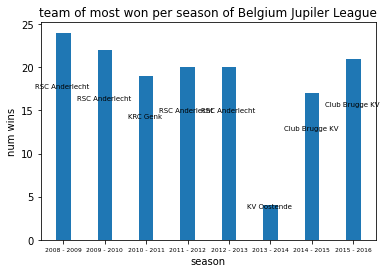

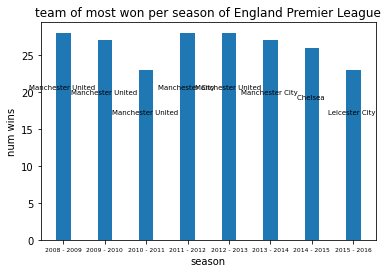

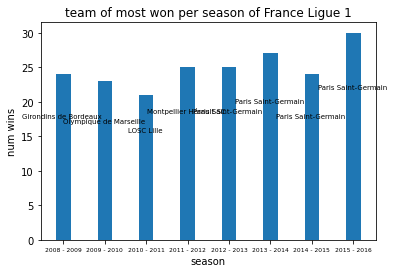

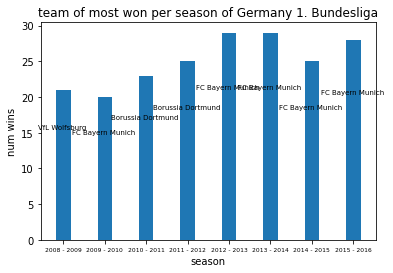

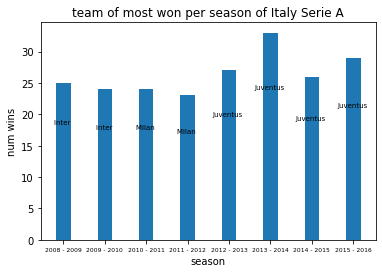

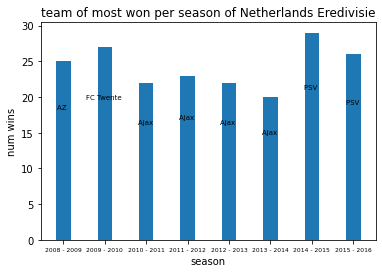

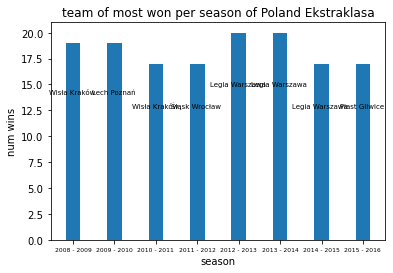

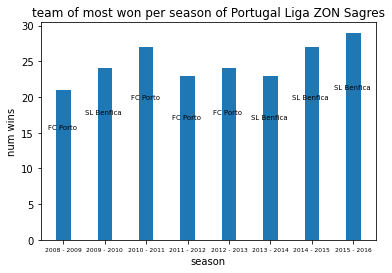

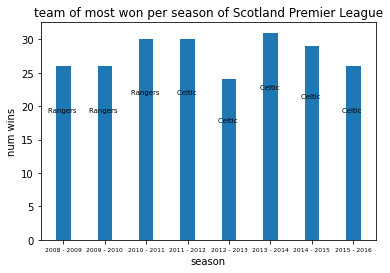

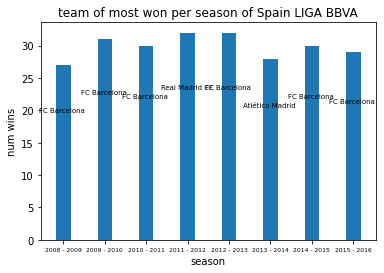

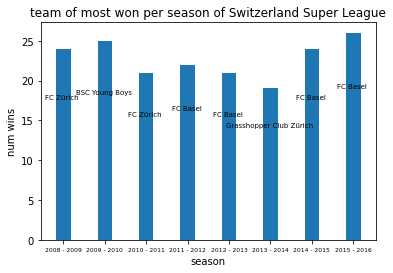

In [59]:
leagues = most_wins.league.unique()
count = 0
for league in leagues:
    new_df = most_wins[most_wins['league'] == league]
    labels = new_df.season
    x = np.arange(len(labels))
    count_wins = new_df.count_wins
    width = 0.35
    fig, ax = plt.subplots()
    rects = ax.bar(x , count_wins, width)
    ax.set_ylabel('num wins')
    ax.set_xlabel('season')
    ax.set_title("team of most won per season of " + league)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=6)
    teams_label = new_df.team_name
    for rect in rects:
        team_name = teams_label[count].split("(")[0]
        height = rect.get_height() +1
        ax.text(rect.get_x()+ width*0.5, 0.7*height, team_name,
                    ha='center', va='bottom', fontsize=7)
        count = count +1
    plt.show()

In [60]:
team_match.head()

,id,match_api_id,date,home_team,home_team_api_id,home_team_goal,away_team,away_team_api_id,away_team_goal,country_league_id,stage,season_start,season_end,countryName,leagueName,winner
0,1,492473,2008-08-17,KRC Genk (GEN),9987,1,Beerschot AC (BAC),9993,1,1,1,2008,2009,Belgium,Belgium Jupiler League,Tie
1,483,665353,2009-08-30,KRC Genk (GEN),9987,1,Beerschot AC (BAC),9993,1,1,5,2009,2010,Belgium,Belgium Jupiler League,Tie
2,524,838476,2010-08-01,KRC Genk (GEN),9987,2,Beerschot AC (BAC),9993,1,1,1,2010,2011,Belgium,Belgium Jupiler League,KRC Genk (GEN)
3,759,1032694,2011-07-30,KRC Genk (GEN),9987,3,Beerschot AC (BAC),9993,1,1,1,2011,2012,Belgium,Belgium Jupiler League,KRC Genk (GEN)
4,1014,1224064,2012-10-20,KRC Genk (GEN),9987,3,Beerschot AC (BAC),9993,0,1,11,2012,2013,Belgium,Belgium Jupiler League,KRC Genk (GEN)


In [61]:
df = team_match[team_match['leagueName'] == 'Belgium Jupiler League']
df = df[df['season_start'] == '2013']
df.head()

,id,match_api_id,date,home_team,home_team_api_id,home_team_goal,away_team,away_team_api_id,away_team_goal,country_league_id,stage,season_start,season_end,countryName,leagueName,winner
784,1239,1677181,2014-04-05,Lierse SK (LIE),9989,1,KAA Gent (GEN),9991,0,1,2,2013,2014,Belgium,Belgium Jupiler League,Lierse SK (LIE)
791,1243,1677185,2014-04-19,Waasland-Beveren (WAA),8475,2,KAA Gent (GEN),9991,4,1,4,2013,2014,Belgium,Belgium Jupiler League,KAA Gent (GEN)
794,1246,1677188,2014-04-26,KV Oostende (OOS),8573,1,KAA Gent (GEN),9991,1,1,5,2013,2014,Belgium,Belgium Jupiler League,Tie
1418,1248,1677190,2014-05-03,KAA Gent (GEN),9991,4,Lierse SK (LIE),9989,0,1,6,2013,2014,Belgium,Belgium Jupiler League,KAA Gent (GEN)
1461,1237,1677179,2014-03-29,Waasland-Beveren (WAA),8475,2,Lierse SK (LIE),9989,0,1,1,2013,2014,Belgium,Belgium Jupiler League,Waasland-Beveren (WAA)


#### Comparing most goal team vs most won team per season and per league

In [62]:
num_goal_highest.head()

,index,leagueName,season_start,team_name,total_num_goal
0,11,Belgium Jupiler League,2008 - 2009,RSC Anderlecht (AND),75
1,27,Belgium Jupiler League,2009 - 2010,RSC Anderlecht (AND),62
2,37,Belgium Jupiler League,2010 - 2011,KRC Genk (GEN),64
3,51,Belgium Jupiler League,2011 - 2012,KAA Gent (GEN),63
4,75,Belgium Jupiler League,2012 - 2013,RSC Anderlecht (AND),69


In [63]:
most_wins.head()

,index,league,season,team_name,count_wins
0,75,Belgium Jupiler League,2008 - 2009,RSC Anderlecht (AND),24
1,117,Belgium Jupiler League,2009 - 2010,RSC Anderlecht (AND),22
2,226,Belgium Jupiler League,2010 - 2011,KRC Genk (GEN),19
3,177,Belgium Jupiler League,2011 - 2012,RSC Anderlecht (AND),20
4,201,Belgium Jupiler League,2012 - 2013,RSC Anderlecht (AND),20


In [64]:
team_goal_won = pd.merge(num_goal_highest, most_wins,  how='left', 
                         left_on=['leagueName','season_start'], right_on = ['league','season'])
team_goal_won = team_goal_won.drop(['index_x', 'league', 'season', 'index_y'], axis = 1)
team_goal_won = team_goal_won.rename(columns={"team_name_x": "team_highest_goal", "team_name_y": "team_most_won", 
                                              "season_start": "season"})
team_goal_won.head()

,leagueName,season,team_highest_goal,total_num_goal,team_most_won,count_wins
0,Belgium Jupiler League,2008 - 2009,RSC Anderlecht (AND),75,RSC Anderlecht (AND),24
1,Belgium Jupiler League,2009 - 2010,RSC Anderlecht (AND),62,RSC Anderlecht (AND),22
2,Belgium Jupiler League,2010 - 2011,KRC Genk (GEN),64,KRC Genk (GEN),19
3,Belgium Jupiler League,2011 - 2012,KAA Gent (GEN),63,RSC Anderlecht (AND),20
4,Belgium Jupiler League,2012 - 2013,RSC Anderlecht (AND),69,RSC Anderlecht (AND),20


In [65]:
goal_won_same = team_goal_won[team_goal_won['team_highest_goal'] == team_goal_won['team_most_won']]
goal_won_same.shape

(56, 6)

In [66]:
percent = goal_won_same.shape[0] / team_goal_won.shape[0]
percent * 100

63.63636363636363

#### The team with the highest goals won the most of the season, roughly 64%. We can think if the team got the highest number of goal in a season then the chance the team will win the season is about 64%. 

In [67]:
A.head()

,leagueName,season_start,away_team,home_team_goal,away_team_goal,total_num_goal
0,Belgium Jupiler League,2008,Beerschot AC (BAC),32,12,44
1,Belgium Jupiler League,2008,Club Brugge KV (CLB),37,22,59
2,Belgium Jupiler League,2008,FCV Dender EH (DEN),21,23,44
3,Belgium Jupiler League,2008,KAA Gent (GEN),31,36,67
4,Belgium Jupiler League,2008,KRC Genk (GEN),23,25,48


In [68]:
for index, row in A.iterrows():
    A.iloc[index, 1] = str(A.iloc[index, 1]) + " - " + str(A.iloc[index, 1] + 1)
A.head()

,leagueName,season_start,away_team,home_team_goal,away_team_goal,total_num_goal
0,Belgium Jupiler League,2008 - 2009,Beerschot AC (BAC),32,12,44
1,Belgium Jupiler League,2008 - 2009,Club Brugge KV (CLB),37,22,59
2,Belgium Jupiler League,2008 - 2009,FCV Dender EH (DEN),21,23,44
3,Belgium Jupiler League,2008 - 2009,KAA Gent (GEN),31,36,67
4,Belgium Jupiler League,2008 - 2009,KRC Genk (GEN),23,25,48


In [69]:
A = A.rename(columns={"away_team": "team_name"})
A.drop(columns = ['home_team_goal', 'away_team_goal'], axis = 1, inplace = True)

In [70]:
A.head()

,leagueName,season_start,team_name,total_num_goal
0,Belgium Jupiler League,2008 - 2009,Beerschot AC (BAC),44
1,Belgium Jupiler League,2008 - 2009,Club Brugge KV (CLB),59
2,Belgium Jupiler League,2008 - 2009,FCV Dender EH (DEN),44
3,Belgium Jupiler League,2008 - 2009,KAA Gent (GEN),67
4,Belgium Jupiler League,2008 - 2009,KRC Genk (GEN),48


In [71]:
B.head()

,league,season,team_name,count_wins
0,Italy Serie A,2013 - 2014,Juventus (JUV),33
1,Spain LIGA BBVA,2011 - 2012,Real Madrid CF (REA),32
2,Spain LIGA BBVA,2012 - 2013,FC Barcelona (BAR),32
3,Scotland Premier League,2013 - 2014,Celtic (CEL),31
4,Spain LIGA BBVA,2009 - 2010,FC Barcelona (BAR),31


In [72]:
team_goal_won_total = pd.merge(A, B,  how='left', 
                         left_on=['leagueName','season_start', 'team_name'], right_on = ['league','season', 'team_name'])
team_goal_won_total = team_goal_won_total.drop(['league', 'season'], axis = 1)
team_goal_won_total = team_goal_won_total.rename(columns={"season_start": "season"})
team_goal_won_total.head()

,leagueName,season,team_name,total_num_goal,count_wins
0,Belgium Jupiler League,2008 - 2009,Beerschot AC (BAC),44,11
1,Belgium Jupiler League,2008 - 2009,Club Brugge KV (CLB),59,18
2,Belgium Jupiler League,2008 - 2009,FCV Dender EH (DEN),44,9
3,Belgium Jupiler League,2008 - 2009,KAA Gent (GEN),67,17
4,Belgium Jupiler League,2008 - 2009,KRC Genk (GEN),48,15


## 3. Comparing attributes of the two teams among most successful team of each league. 

In [73]:
team_goal_won.head()

,leagueName,season,team_highest_goal,total_num_goal,team_most_won,count_wins
0,Belgium Jupiler League,2008 - 2009,RSC Anderlecht (AND),75,RSC Anderlecht (AND),24
1,Belgium Jupiler League,2009 - 2010,RSC Anderlecht (AND),62,RSC Anderlecht (AND),22
2,Belgium Jupiler League,2010 - 2011,KRC Genk (GEN),64,KRC Genk (GEN),19
3,Belgium Jupiler League,2011 - 2012,KAA Gent (GEN),63,RSC Anderlecht (AND),20
4,Belgium Jupiler League,2012 - 2013,RSC Anderlecht (AND),69,RSC Anderlecht (AND),20


In [74]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [75]:
com_teams = []
leagues = most_wins.league.unique()
for league in leagues:
    new_df = team_goal_won[team_goal_won['leagueName'] == league]
    a = new_df['team_most_won'].value_counts()
    com_teams.append([league, a.index[0], a.index[1]])
df = pd.DataFrame(com_teams, columns = ['leangue', 'team1', 'team2']) 
df.head()

,leangue,team1,team2
0,Belgium Jupiler League,RSC Anderlecht (AND),Club Brugge KV (CLB)
1,England Premier League,Manchester United (MUN),Manchester City (MCI)
2,France Ligue 1,Paris Saint-Germain (PSG),Olympique de Marseille (MAR)
3,Germany 1. Bundesliga,FC Bayern Munich (BMU),Borussia Dortmund (DOR)
4,Italy Serie A,Juventus (JUV),Inter (INT)


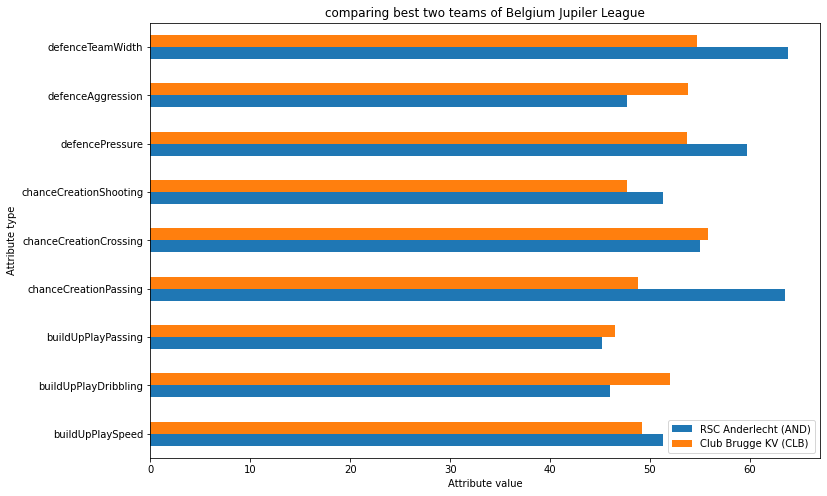

In [76]:
# Belgium Jupiler League
compare_attr = pd.DataFrame(data=team_attribute.query('team_name == "RSC Anderlecht (AND)"').mean(),
                            columns=['RSC Anderlecht (AND)'])
compare_attr['Club Brugge KV (CLB)'] = team_attribute.query('team_name == "Club Brugge KV (CLB)"').mean()
compare_attr = compare_attr[3:]

compare_attr.plot.barh(width=0.50, figsize=(12,8))
plt.title('comparing best two teams of Belgium Jupiler League')
plt.ylabel('Attribute type')
plt.xlabel('Attribute value')
plt.legend(loc=0);

#### The most winner in Belgium Jupiler League was RSC Anderlecht and it was mostly ahead in all attribute than the second most won team, Club Brugge except in defenceAggression and buildUpPlayDribbling. 

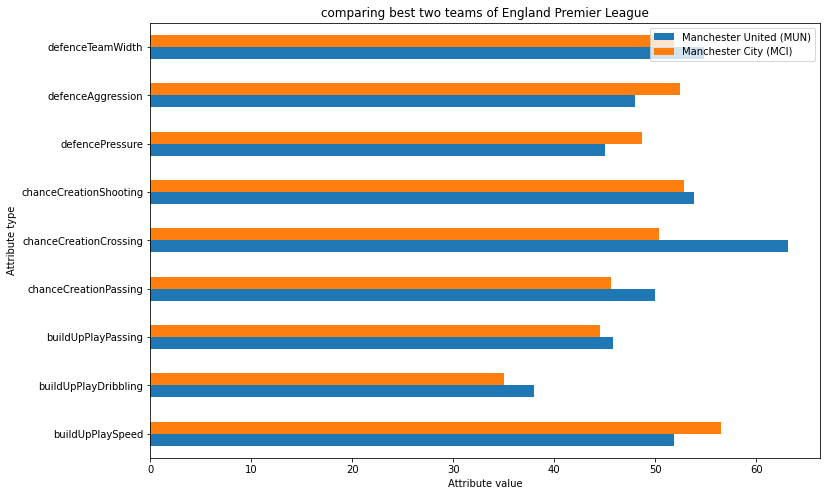

In [77]:
# England Premier League
compare_attr = pd.DataFrame(data=team_attribute.query('team_name == "Manchester United (MUN)"').mean(),
                            columns=['Manchester United (MUN)'])
compare_attr['Manchester City (MCI)'] = team_attribute.query('team_name == "Manchester City (MCI)"').mean()
compare_attr = compare_attr[3:]
compare_attr

compare_attr.plot.barh(width=0.50, figsize=(12,8))
plt.title('comparing best two teams of England Premier League')
plt.ylabel('Attribute type')
plt.xlabel('Attribute value')
plt.legend(loc = 0);

#### The most winner in England Premier League was Manchester United and it was ahead in most all attribute than the second most won team, Manchester City except in defenceAggression,  defencePressure and buildUpPlaySpeed. 

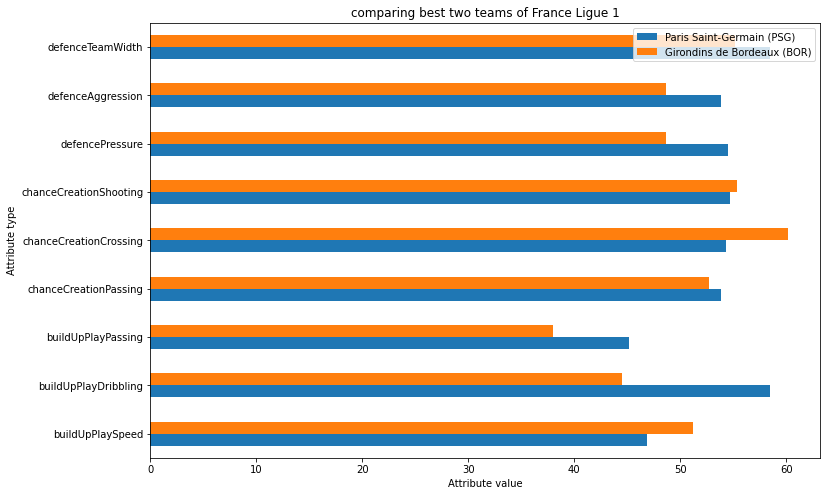

In [78]:
# France Ligue 1
compare_attr = pd.DataFrame(data=team_attribute.query('team_name == "Paris Saint-Germain (PSG)"').mean(),
                            columns=['Paris Saint-Germain (PSG)'])
compare_attr['Girondins de Bordeaux (BOR)'] = team_attribute.query('team_name == "Girondins de Bordeaux (BOR)"').mean()
compare_attr = compare_attr[3:]
compare_attr

compare_attr.plot.barh(width=0.50, figsize=(12,8))
plt.title('comparing best two teams of France Ligue 1')
plt.ylabel('Attribute type')
plt.xlabel('Attribute value')
plt.legend(loc = 0);

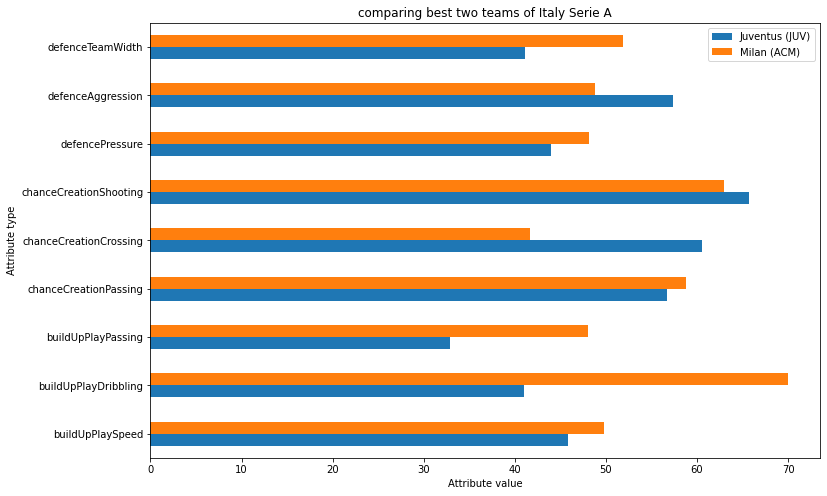

In [79]:
# Italy Serie A
compare_attr = pd.DataFrame(data=team_attribute.query('team_name == "Juventus (JUV)"').mean(),
                            columns=['Juventus (JUV)'])
compare_attr['Milan (ACM)'] = team_attribute.query('team_name == "Milan (ACM)"').mean()
compare_attr = compare_attr[3:]
compare_attr

compare_attr.plot.barh(width=0.50, figsize=(12,8))
plt.title('comparing best two teams of Italy Serie A')
plt.ylabel('Attribute type')
plt.xlabel('Attribute value')
plt.legend(loc = 0);

#### Interestingly, Milan(The second most winner) were ahead a lot in some attribute such as buildUpDribbling and buildUpPlayPassing but Juventus took the place of the first most winner. 

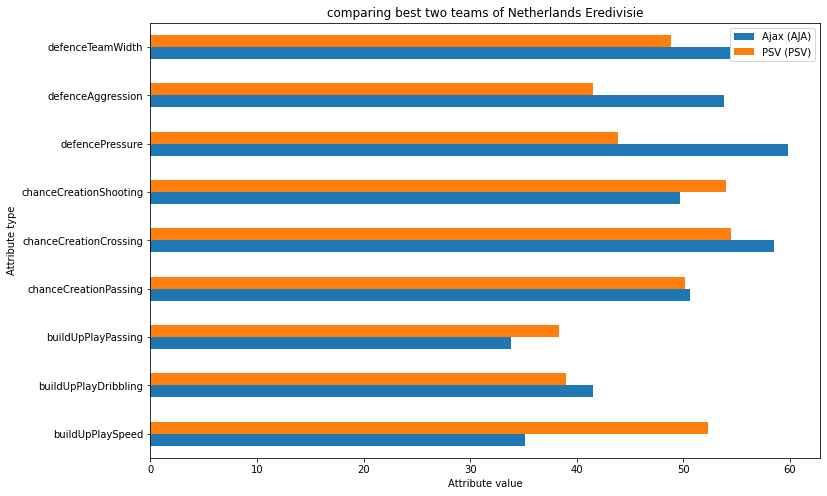

In [80]:
# Netherlands Eredivisie	Ajax (AJA)	PSV (PSV)
# Netherlands Eredivisie
compare_attr = pd.DataFrame(data=team_attribute.query('team_name == "Ajax (AJA)"').mean(),
                            columns=['Ajax (AJA)'])
compare_attr['PSV (PSV)'] = team_attribute.query('team_name == "PSV (PSV)"').mean()
compare_attr = compare_attr[3:]
compare_attr

compare_attr.plot.barh(width=0.50, figsize=(12,8))
plt.title('comparing best two teams of Netherlands Eredivisie')
plt.ylabel('Attribute type')
plt.xlabel('Attribute value')
plt.legend(loc = 0);

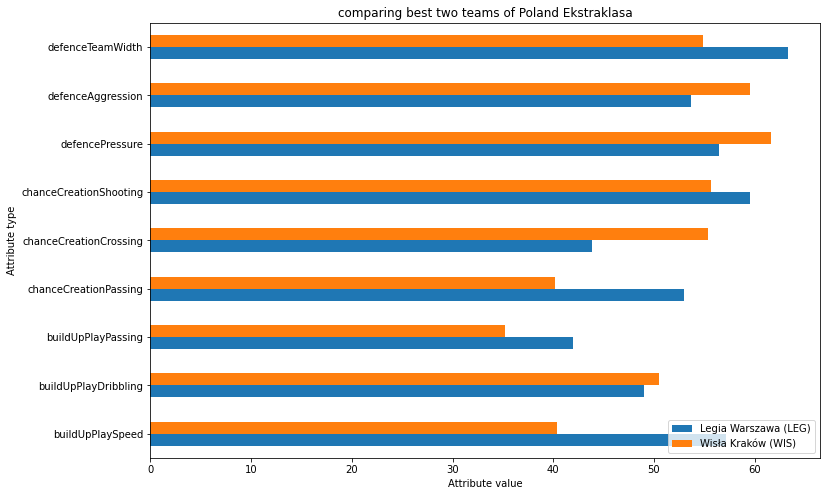

In [81]:
# Poland Ekstraklasa	Legia Warszawa (LEG)	Wisła Kraków (WIS)
# Poland Ekstraklasa
compare_attr = pd.DataFrame(data=team_attribute.query('team_name == "Legia Warszawa (LEG)"').mean(),
                            columns=['Legia Warszawa (LEG)'])
compare_attr['Wisła Kraków (WIS)'] = team_attribute.query('team_name == "Wisła Kraków (WIS)"').mean()
compare_attr = compare_attr[3:]
compare_attr

compare_attr.plot.barh(width=0.50, figsize=(12,8))
plt.title('comparing best two teams of Poland Ekstraklasa')
plt.ylabel('Attribute type')
plt.xlabel('Attribute value')
plt.legend(loc = 0);

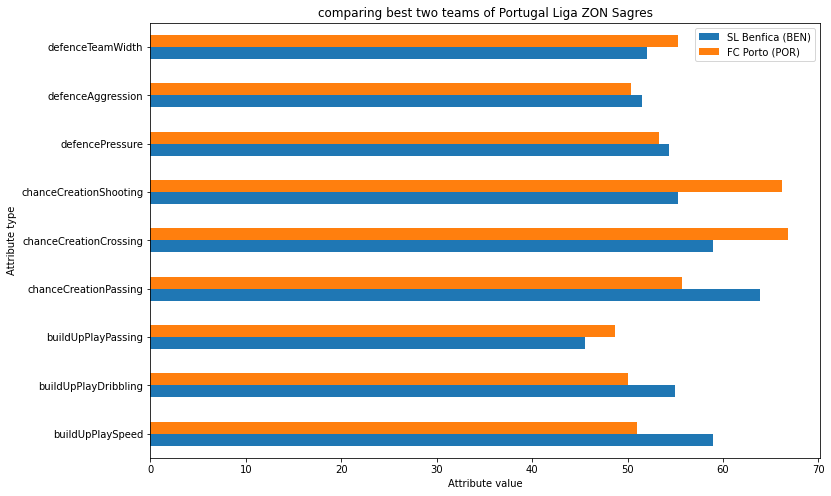

In [82]:
# Portugal Liga ZON Sagres	SL Benfica (BEN)	FC Porto (POR)
# Portugal Liga ZON Sagres
compare_attr = pd.DataFrame(data=team_attribute.query('team_name == "SL Benfica (BEN)"').mean(),
                            columns=['SL Benfica (BEN)'])
compare_attr['FC Porto (POR)'] = team_attribute.query('team_name == "FC Porto (POR)"').mean()
compare_attr = compare_attr[3:]
compare_attr

compare_attr.plot.barh(width=0.50, figsize=(12,8))
plt.title('comparing best two teams of Portugal Liga ZON Sagres')
plt.ylabel('Attribute type')
plt.xlabel('Attribute value')
plt.legend(loc = 0);

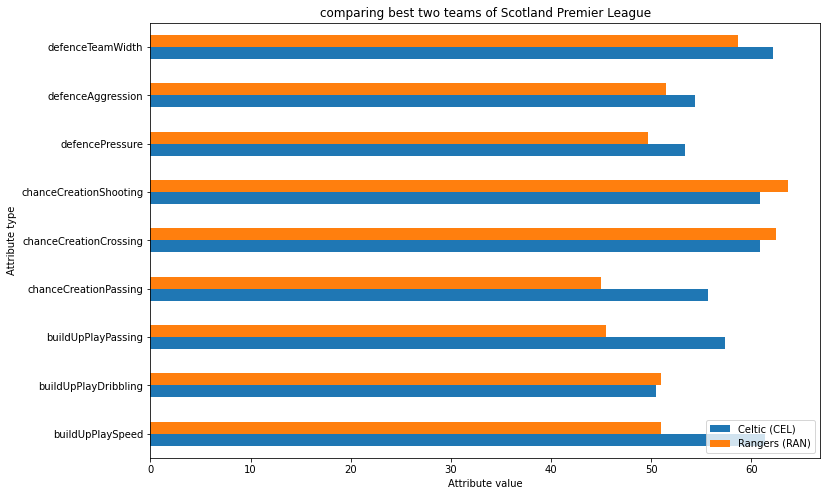

In [83]:
# Scotland Premier League	Celtic (CEL)	Rangers (RAN)
# Scotland Premier League
compare_attr = pd.DataFrame(data=team_attribute.query('team_name == "Celtic (CEL)"').mean(),
                            columns=['Celtic (CEL)'])
compare_attr['Rangers (RAN)'] = team_attribute.query('team_name == "Rangers (RAN)"').mean()
compare_attr = compare_attr[3:]
compare_attr

compare_attr.plot.barh(width=0.50, figsize=(12,8))
plt.title('comparing best two teams of Scotland Premier League')
plt.ylabel('Attribute type')
plt.xlabel('Attribute value')
plt.legend(loc = 0);

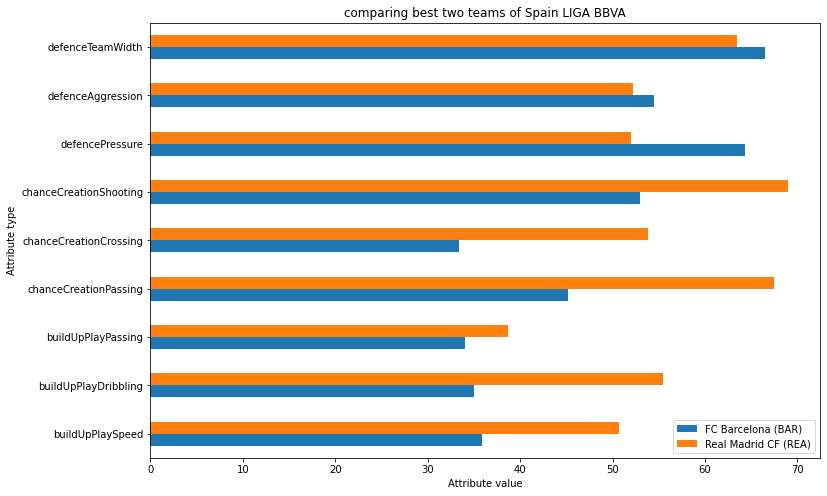

In [84]:
# Spain LIGA BBVA	FC Barcelona (BAR)	Real Madrid CF (REA)
# Spain LIGA BBVA
compare_attr = pd.DataFrame(data=team_attribute.query('team_name == "FC Barcelona (BAR)"').mean(),
                            columns=['FC Barcelona (BAR)'])
compare_attr['Real Madrid CF (REA)'] = team_attribute.query('team_name == "Real Madrid CF (REA)"').mean()
compare_attr = compare_attr[3:]
compare_attr

compare_attr.plot.barh(width=0.50, figsize=(12,8))
plt.title('comparing best two teams of Spain LIGA BBVA')
plt.ylabel('Attribute type')
plt.xlabel('Attribute value')
plt.legend(loc = 0);

#### In LIGA BBVA league, even though the second team(Real Madrid) was ahead 6 attributes in total 9, the first most winner was FC Barcelona.

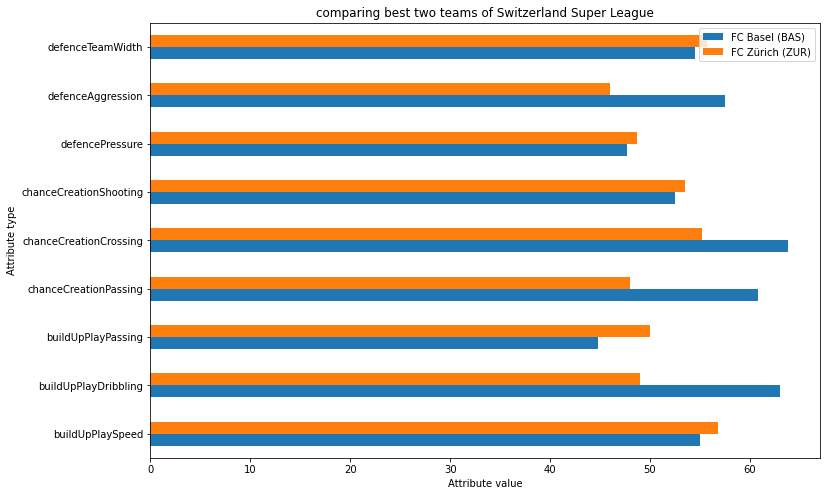

In [85]:
# Switzerland Super League	FC Basel (BAS)	FC Zürich (ZUR)
# Switzerland Super League
compare_attr = pd.DataFrame(data=team_attribute.query('team_name == "FC Basel (BAS)"').mean(),
                            columns=['FC Basel (BAS)'])
compare_attr['FC Zürich (ZUR)'] = team_attribute.query('team_name == "FC Zürich (ZUR)"').mean()
compare_attr = compare_attr[3:]
compare_attr

compare_attr.plot.barh(width=0.50, figsize=(12,8))
plt.title('comparing best two teams of Switzerland Super League')
plt.ylabel('Attribute type')
plt.xlabel('Attribute value')
plt.legend(loc = 0);

## 4. Compare goal count as a home team and a away team and win count as a home team and a way team

In [86]:
team_goal_won_total['game_count_as_hometeam'] = 'NAN'
team_goal_won_total['goal_count_as_hometeam'] = 'NAN'
team_goal_won_total['win_count_as_hometeam'] = 'NAN'
team_goal_won_total.head()

,leagueName,season,team_name,total_num_goal,count_wins,game_count_as_hometeam,goal_count_as_hometeam,win_count_as_hometeam
0,Belgium Jupiler League,2008 - 2009,Beerschot AC (BAC),44,11,NAN,NAN,NAN
1,Belgium Jupiler League,2008 - 2009,Club Brugge KV (CLB),59,18,NAN,NAN,NAN
2,Belgium Jupiler League,2008 - 2009,FCV Dender EH (DEN),44,9,NAN,NAN,NAN
3,Belgium Jupiler League,2008 - 2009,KAA Gent (GEN),67,17,NAN,NAN,NAN
4,Belgium Jupiler League,2008 - 2009,KRC Genk (GEN),48,15,NAN,NAN,NAN


In [87]:
team_goal_won_total['game_count_as_awayteam'] = 'NAN'
team_goal_won_total['goal_count_as_awayteam'] = 'NAN'
team_goal_won_total['win_count_as_awayteam'] = 'NAN'
team_goal_won_total.head()

,leagueName,season,team_name,total_num_goal,count_wins,game_count_as_hometeam,goal_count_as_hometeam,win_count_as_hometeam,game_count_as_awayteam,goal_count_as_awayteam,win_count_as_awayteam
0,Belgium Jupiler League,2008 - 2009,Beerschot AC (BAC),44,11,NAN,NAN,NAN,NAN,NAN,NAN
1,Belgium Jupiler League,2008 - 2009,Club Brugge KV (CLB),59,18,NAN,NAN,NAN,NAN,NAN,NAN
2,Belgium Jupiler League,2008 - 2009,FCV Dender EH (DEN),44,9,NAN,NAN,NAN,NAN,NAN,NAN
3,Belgium Jupiler League,2008 - 2009,KAA Gent (GEN),67,17,NAN,NAN,NAN,NAN,NAN,NAN
4,Belgium Jupiler League,2008 - 2009,KRC Genk (GEN),48,15,NAN,NAN,NAN,NAN,NAN,NAN


In [88]:
team_goal_won_total['num_total_game'] = 'NAN'
team_goal_won_total.head()

,leagueName,season,team_name,total_num_goal,count_wins,game_count_as_hometeam,goal_count_as_hometeam,win_count_as_hometeam,game_count_as_awayteam,goal_count_as_awayteam,win_count_as_awayteam,num_total_game
0,Belgium Jupiler League,2008 - 2009,Beerschot AC (BAC),44,11,NAN,NAN,NAN,NAN,NAN,NAN,NAN
1,Belgium Jupiler League,2008 - 2009,Club Brugge KV (CLB),59,18,NAN,NAN,NAN,NAN,NAN,NAN,NAN
2,Belgium Jupiler League,2008 - 2009,FCV Dender EH (DEN),44,9,NAN,NAN,NAN,NAN,NAN,NAN,NAN
3,Belgium Jupiler League,2008 - 2009,KAA Gent (GEN),67,17,NAN,NAN,NAN,NAN,NAN,NAN,NAN
4,Belgium Jupiler League,2008 - 2009,KRC Genk (GEN),48,15,NAN,NAN,NAN,NAN,NAN,NAN,NAN


In [89]:
team_match['season'] = team_match['season_start'] + " - " + team_match['season_end']

In [90]:
for index, row in team_goal_won_total.iterrows():
    season = team_goal_won_total.iloc[index, 1]
    team_name = team_goal_won_total.iloc[index, 2]
    df = team_match[(team_match['season'] == season) & (team_match['home_team'] == team_name)]
    team_goal_won_total.iloc[index, 6] = df['home_team_goal'].sum()
    team_goal_won_total.iloc[index, 5] = df.shape[0]
    new_df = df[df['winner'] == team_name]
    team_goal_won_total.iloc[index, 7] = new_df.shape[0]
    
    df = team_match[(team_match['season'] == season) & (team_match['away_team'] == team_name)]
    team_goal_won_total.iloc[index, 9] = df['away_team_goal'].sum()
    team_goal_won_total.iloc[index, 8] = df.shape[0]
    new_df = df[df['winner'] == team_name]
    team_goal_won_total.iloc[index, 10] = new_df.shape[0]
    team_goal_won_total.iloc[index, 11] = team_goal_won_total.iloc[index, 5] + team_goal_won_total.iloc[index, 8]
team_goal_won_total.head()

,leagueName,season,team_name,total_num_goal,count_wins,game_count_as_hometeam,goal_count_as_hometeam,win_count_as_hometeam,game_count_as_awayteam,goal_count_as_awayteam,win_count_as_awayteam,num_total_game
0,Belgium Jupiler League,2008 - 2009,Beerschot AC (BAC),44,11,17,32,9,17,12,2,34
1,Belgium Jupiler League,2008 - 2009,Club Brugge KV (CLB),59,18,17,37,11,17,22,7,34
2,Belgium Jupiler League,2008 - 2009,FCV Dender EH (DEN),44,9,17,21,5,17,23,4,34
3,Belgium Jupiler League,2008 - 2009,KAA Gent (GEN),67,17,17,31,9,17,36,8,34
4,Belgium Jupiler League,2008 - 2009,KRC Genk (GEN),48,15,17,23,7,17,25,8,34


In [91]:
team_goal_won_total.columns

Index(['leagueName', 'season', 'team_name', 'total_num_goal', 'count_wins',
       'game_count_as_hometeam', 'goal_count_as_hometeam',
       'win_count_as_hometeam', 'game_count_as_awayteam',
       'goal_count_as_awayteam', 'win_count_as_awayteam', 'num_total_game'],
      dtype='object')

In [92]:
team_goal_won_total = team_goal_won_total[['leagueName', 'season', 'team_name', 'num_total_game', 'game_count_as_hometeam',
                                           'game_count_as_awayteam', 'count_wins', 'win_count_as_hometeam', 
                         'win_count_as_awayteam', 'total_num_goal', 'goal_count_as_hometeam', 'goal_count_as_awayteam']]
team_goal_won_total = team_goal_won_total.rename(columns={"num_total_game": "game_count_total", "count_wins": "win_count_total", "total_num_goal": "goal_count_total"})
team_goal_won_total.head()

,leagueName,season,team_name,game_count_total,game_count_as_hometeam,game_count_as_awayteam,win_count_total,win_count_as_hometeam,win_count_as_awayteam,goal_count_total,goal_count_as_hometeam,goal_count_as_awayteam
0,Belgium Jupiler League,2008 - 2009,Beerschot AC (BAC),34,17,17,11,9,2,44,32,12
1,Belgium Jupiler League,2008 - 2009,Club Brugge KV (CLB),34,17,17,18,11,7,59,37,22
2,Belgium Jupiler League,2008 - 2009,FCV Dender EH (DEN),34,17,17,9,5,4,44,21,23
3,Belgium Jupiler League,2008 - 2009,KAA Gent (GEN),34,17,17,17,9,8,67,31,36
4,Belgium Jupiler League,2008 - 2009,KRC Genk (GEN),34,17,17,15,7,8,48,23,25


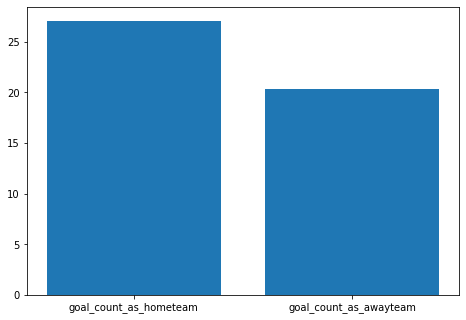

In [93]:
 new_df = team_goal_won_total[team_goal_won_total.columns[-2:]]
df1 = new_df.mean().to_frame()
df1.reset_index(inplace=True)  
df1 = df1.rename(columns={"index": "type", 0: "mean_goal_count"})

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = df1.type
y = df1.mean_goal_count
ax.bar(x,y)
plt.show()

#### The mean value of total goal count as a home team is higher than the mean value of total goal count as a away team. When it comes to the home team, it can be said that the score is higher than when it is the away team. 

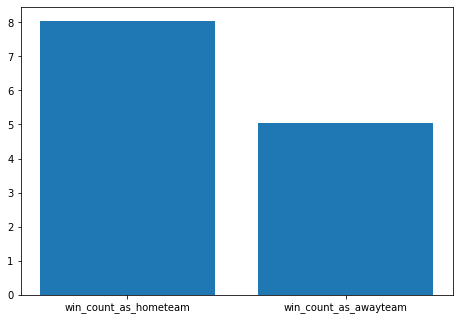

In [94]:
# win vs home or away
new_df = team_goal_won_total[team_goal_won_total.columns[7:9]]
df1 = new_df.mean().to_frame()
df1.reset_index(inplace=True)  
df1 = df1.rename(columns={"index": "type", 0: "mean_win_count"})

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = df1.type
y = df1.mean_win_count
ax.bar(x,y)
plt.show()

#### Likewise, the home team won more than the away team.

## 5. Is there a relationship between player attributes and their overall_rating?

[-0.02712711  0.01414654  0.10463825  0.08053166  0.13160613  0.07051224
  0.00833057 -0.01379527 -0.01003446]


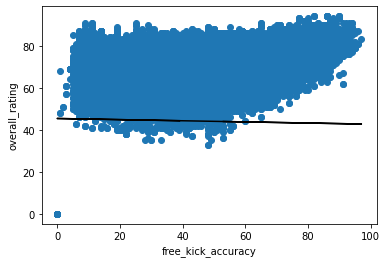

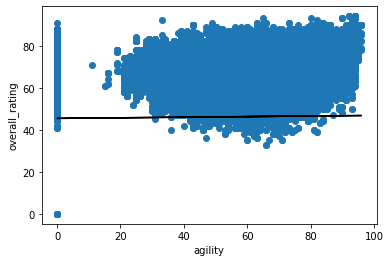

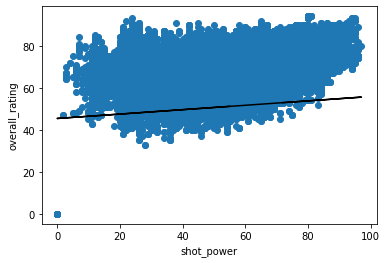

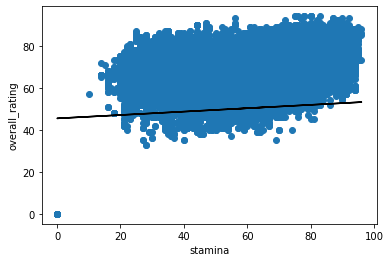

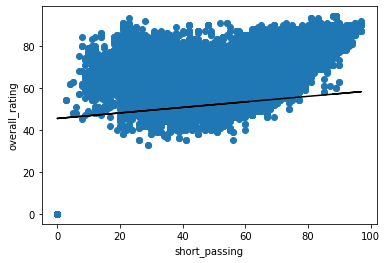

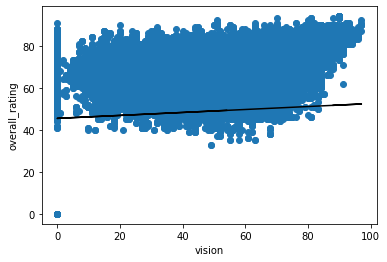

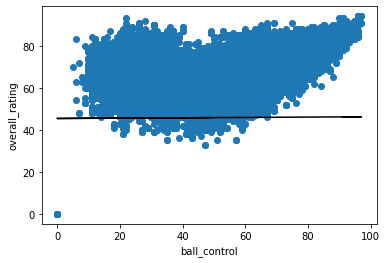

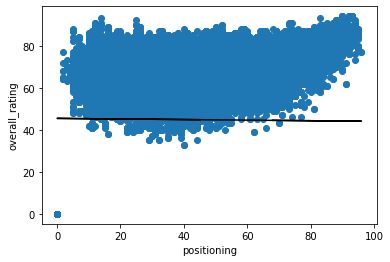

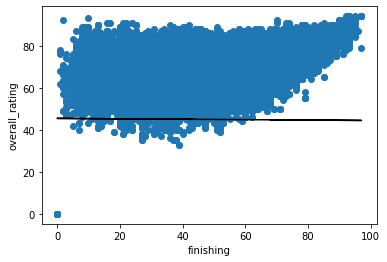

In [95]:
attributes = player_Attributes[['free_kick_accuracy','agility','shot_power','stamina', 'short_passing', 'vision', 'ball_control', 'positioning', 'finishing']].fillna(0).astype('int32')

reg = LinearRegression().fit(attributes, player_Attributes['overall_rating'].fillna(0))

print(reg.coef_)

i = 0
for x in list(attributes):
    fig, ax = plt.subplots()
    ax.set_ylabel('overall_rating')
    ax.set_xlabel(x)
    ax.scatter(attributes[x],player_Attributes['overall_rating'].fillna(0))
    ax.plot(attributes[x], reg.coef_[i]*attributes[x] + reg.intercept_, 'k')
    i = i + 1
plt.show()

## 6. which player has highest overall_rating per year?

In [96]:
grouped_player = player_Attributes.groupby([player_Attributes['date'].dt.year])
players_list = []
ratings = []
seasons = []
for name, group in grouped_player:
    df = group.sort_values('overall_rating', ascending=False)
    row = df.iloc[0]
    player = players.loc[players[players['player_fifa_api_id'] == row['player_fifa_api_id']].index, 'player_name']
    players_list.append(player.values[0])
    ratings.append(row['overall_rating'])
    seasons.append(name)

overall_rating = pd.DataFrame(data={"seasons" : seasons, 'player' : players_list, "rating" : ratings})
overall_rating

,seasons,player,rating
0,2007,Wayne Rooney,93.0
1,2008,Cristiano Ronaldo,91.0
2,2009,Iker Casillas,91.0
3,2010,Lionel Messi,90.0
4,2011,Lionel Messi,94.0
5,2012,Lionel Messi,94.0
6,2013,Lionel Messi,94.0
7,2014,Lionel Messi,94.0
8,2015,Lionel Messi,94.0
9,2016,Neymar,90.0


Correlations from these results:

Wayne Rooney and cristiano Ronaldo were the two highest rated players during in 2007/2008, both of which played on Manchester United. Manchester United was also the team with the most wins in the Premier League during those years. Similarly, Messi and Neymar have been apart of Barcelona the years they were the highest rated players and while concurrently there at Barcelona, the club had the most wins in the spanish league.

## 7. perferred foot(right vs left) also compared to the average players over all ratting

In [97]:
player_Attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [98]:
p_A_1= player_Attributes[['player_api_id', 'preferred_foot', 'overall_rating', 'potential']]
p_A_1.head()

,player_api_id,preferred_foot,overall_rating,potential
0,505942,right,67.0,71.0
1,505942,right,67.0,71.0
2,505942,right,62.0,66.0
3,505942,right,61.0,65.0
4,505942,right,61.0,65.0


In [99]:
p_A_1= p_A_1.groupby(['player_api_id', 'preferred_foot']).mean()
p_A_1.head()

overall_rating  potential
player_api_id preferred_foot                           
2625          right                60.142857  61.142857
2752          right                69.380952  70.380952
2768          left                 69.285714  70.571429
2770          left                 71.571429  75.285714
              right                70.750000  72.000000

In [100]:
# get the total number of players that are right, left or both and there rating
left_foot=0; left_rating=0.0
right_foot=0; right_rating =0.0
both=0;       both_rating = 0.0
checked=[]
for key, value in p_A_1.iterrows():
    if key[0] in checked:
        both +=1
        both_rating += value[0] 
    elif key[1] == 'right':
        right_foot +=1
        checked.append(key[0])
        right_rating += value[0]
    else:
        left_foot +=1
        checked.append(key[0])
        left_rating += value[0]

In [101]:
total_players= left_foot + right_foot + both
average_left_rating= left_rating/ left_foot
average_right_rating = right_rating/ right_foot
both_rating = both_rating/ both

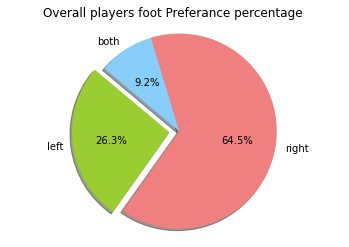

In [102]:
# Data to plot
labels = 'left', 'right', 'both'
sizes = [left_foot, right_foot, both]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Overall players foot Preferance percentage ")
plt.show()

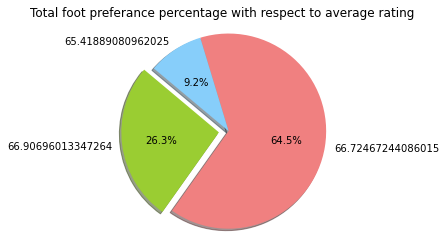

In [103]:
# Data to plot
labels = average_left_rating, average_right_rating, both_rating
sizes = [left_foot, right_foot, both]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Total foot preferance percentage with respect to average rating ")
plt.show()

##  8. winning percentage per number of goal

**looking at the general trend of total team win per season vs total_team_goal per season** 

Text(0.5, 1.0, 'Total number of goals vs wins from 2008- 2016 for each team')

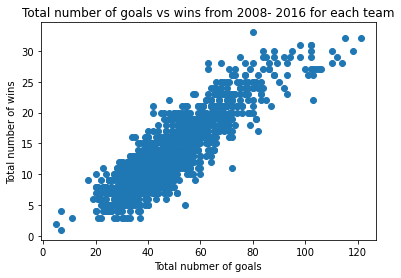

In [104]:
plt.scatter(team_goal_won_total['goal_count_total'], team_goal_won_total['win_count_total'])
plt.ylabel("Total number of wins")
plt.xlabel("Total nubmer of goals")
plt.title("Total number of goals vs wins from 2008- 2016 for each team")

In [105]:
team_goal_won_total['winning_percentage']= (team_goal_won_total['win_count_total'] / team_goal_won_total['game_count_total'])*100
team_goal_won_total.head()

,leagueName,season,team_name,game_count_total,game_count_as_hometeam,game_count_as_awayteam,win_count_total,win_count_as_hometeam,win_count_as_awayteam,goal_count_total,goal_count_as_hometeam,goal_count_as_awayteam,winning_percentage
0,Belgium Jupiler League,2008 - 2009,Beerschot AC (BAC),34,17,17,11,9,2,44,32,12,32.3529
1,Belgium Jupiler League,2008 - 2009,Club Brugge KV (CLB),34,17,17,18,11,7,59,37,22,52.9412
2,Belgium Jupiler League,2008 - 2009,FCV Dender EH (DEN),34,17,17,9,5,4,44,21,23,26.4706
3,Belgium Jupiler League,2008 - 2009,KAA Gent (GEN),34,17,17,17,9,8,67,31,36,50
4,Belgium Jupiler League,2008 - 2009,KRC Genk (GEN),34,17,17,15,7,8,48,23,25,44.1176


Text(0.5, 1.0, 'Wining percentage of all Europian leagues teams Vs there respective goals per season')

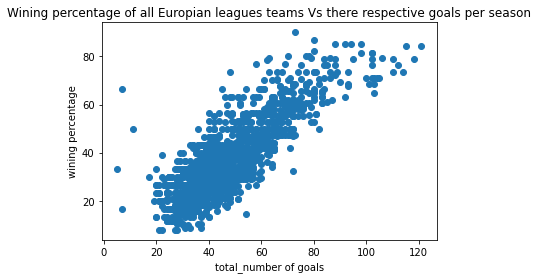

In [106]:
plt.scatter(team_goal_won_total['goal_count_total'], team_goal_won_total['winning_percentage']) 
plt.ylabel("wining percentage")
plt.xlabel("total_number of goals")
plt.title("Wining percentage of all Europian leagues teams Vs there respective goals per season")

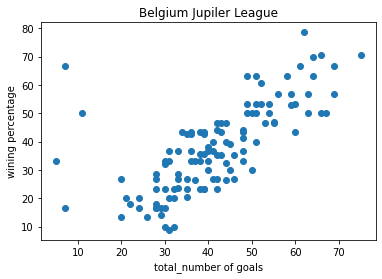

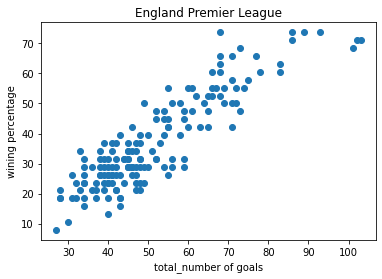

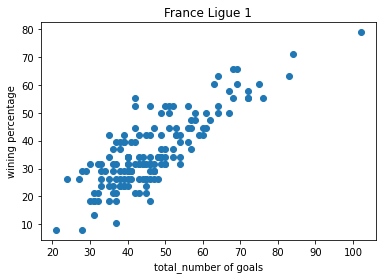

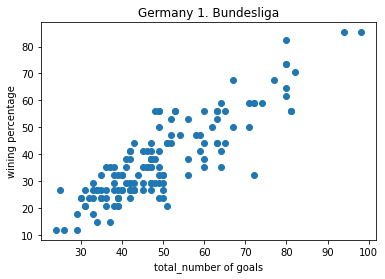

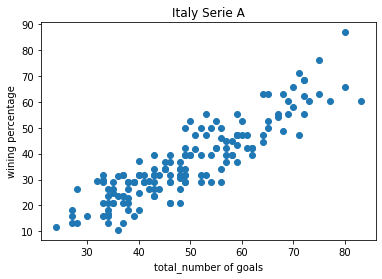

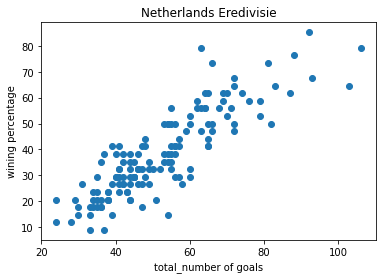

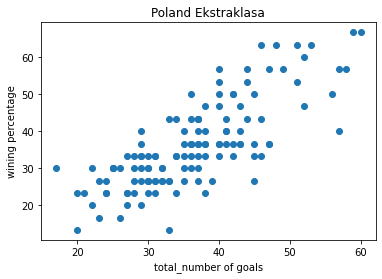

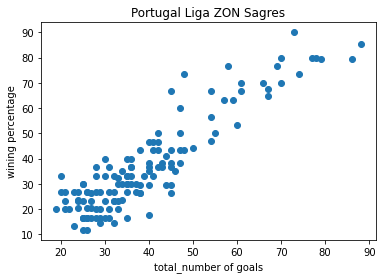

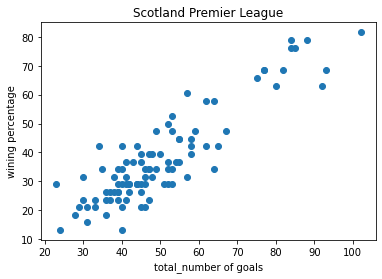

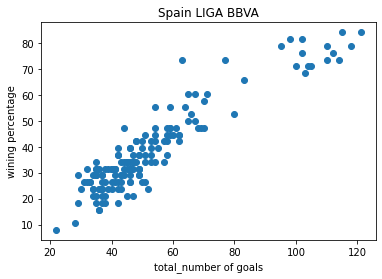

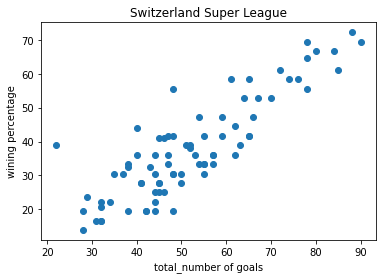

In [107]:
a= team_goal_won_total.groupby(['leagueName'])

for index, value in a:
    
    x= value.goal_count_total
    y= value.winning_percentage
    
    plt.scatter(x, y) 
    plt.ylabel("wining percentage")
    plt.xlabel("total_number of goals")
    plt.title(index)
    plt.show()

# Analysis

## overall_rating(player) as dependent and other features for independent(linear regression)

**Null hypothesis 1:** There is no relation between the overall_rating(player) and other features of player. = reject

**Alternative Hypothesis 1:** There is a relation between the overall_rating(player) and other features of player.

In [108]:
df = player_Attributes
df.shape

(183978, 42)

In [109]:
selected_attr = [
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']
target = ['overall_rating']

In [110]:
df = df.dropna(0)

In [111]:
X = df[selected_attr]
y = df[target]
y.head()

,overall_rating
0,67.0
1,67.0
2,62.0
3,61.0
4,61.0


In [112]:
X

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,85.0,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,80.0,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,80.0,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,81.0,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [114]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [115]:
reg.coef_

array([[ 0.37897627,  0.02307889,  0.01132055,  0.06879581,  0.04988653,
         0.00406006, -0.01373979,  0.01166958,  0.0127192 ,  0.0066108 ,
         0.13458274,  0.00661818,  0.00841669, -0.00882165,  0.2101527 ,
         0.00804474,  0.01579256,  0.01655693, -0.00514578,  0.06163535,
        -0.01213998,  0.02046348,  0.01236675, -0.00959938, -0.00226917,
         0.0142157 ,  0.03351147,  0.00249346, -0.02868055,  0.16384631,
         0.03225526, -0.03431109,  0.05729512,  0.02384816]])

In [116]:
reg.intercept_

array([-3.61437215])

In [117]:
y_prediction = reg.predict(X_test)
y_prediction

array([[57.99194588],
       [65.3671478 ],
       [68.54594731],
       ...,
       [62.92534983],
       [65.52151771],
       [78.29678552]])

In [118]:
score = reg.score(X_test, y_test)
score

0.8401171317759681

In [119]:
import statsmodels.api as sm
X=sm.add_constant(X_train) 
model= sm.OLS(y_train, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 2.123e+04
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        04:02:59   Log-Likelihood:            -3.3088e+05
No. Observations:              135265   AIC:                         6.618e+05
Df Residuals:                  135230   BIC:                         6.622e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.6144      0.108    -33.324      0.000      -3.827      -3.402
potential              0.3790      0.002    223.736      0.000       0.376       0.382
crossing               0.0231      0.001     23.818      0.000       0.021       0.025
finishing              0.0113      0.001     10.610      0.000       0.009       0.013
heading_accuracy       0.0688      0.001     72.421      0.000       0.067       0.071
short_passing          0.0499      0.002     31.189      0.000       0.047       0.053
volleys                0.0041      0.001      4.261      0.000       0.002       0.006
dribbling             -0.0137      0.001    -10.180      0.000      -0.016      -0.011
curve                  0.0117      0.001     12.597      0.000       0.010       0.013
free_kick_accuracy     0.0127      0.001     15.425      0.000       0.011       0.014
long_passing           0.0066      0.001      6.033      0.000       0.004       0.009
ball_control           0.1346      0.002     73.052      0.000       0.131       0.138
acceleration           0.0066      0.002      4.147      0.000       0.003       0.010
sprint_speed           0.0084      0.002      5.571      0.000       0.005       0.011
agility               -0.0088      0.001     -7.514      0.000      -0.011      -0.007
reactions              0.2102      0.001    167.078      0.000       0.208       0.213
balance                0.0080      0.001      8.866      0.000       0.006       0.010
shot_power             0.0158      0.001     15.556      0.000       0.014       0.018
jumping                0.0166      0.001     19.585      0.000       0.015       0.018
stamina               -0.0051      0.001     -5.477      0.000      -0.007      -0.003
strength               0.0616      0.001     63.309      0.000       0.060       0.064
long_shots            -0.0121      0.001    -11.433      0.000      -0.014      -0.010
aggression             0.0205      0.001     25.776      0.000       0.019       0.022
interceptions          0.0124      0.001     14.441      0.000       0.011       0.014
positioning           -0.0096      0.001    -10.440      0.000      -0.011      -0.008
vision                -0.0023      0.001     -2.238      0.025      -0.004      -0.000
penalties              0.0142      0.001     16.399      0.000       0.013       0.016
marking                0.0335      0.001     25.744      0.000       0.031       0.036
standing_tackle        0.0025      0.002      1.653      0.098      -0.000       0.005
sliding_tackle        -0.0287      0.001    -22.389      0.000      -0.031      -0.026
gk_diving              0.1638      0.002     96.465      0.000       0.161       0.167
gk_handling            0.0323      0.002     14.515      0.000       0.028       0.037
gk_kicking            -0.0343      0.0

## winning percentage(team) as dependent and other features for independent(linear regression)
**Null hypothesis 2:** There is no relation between the winning percentage and other features of team. 

**Alternative Hypothesis 2:** There is a relation between the winning percentage and other features of team. 

In [120]:
team_goal_won_total.head() # season별 각 팀 정보
team_goal_won_total['season_start'] = team_goal_won_total['season'].apply(lambda x: x.split('-')[0])
team_goal_won_total['season_end'] = team_goal_won_total['season'].apply(lambda x: x.split('-')[1])
team_goal_won_total.shape

(1481, 15)

In [121]:
team_goal_won_total['season_start'] = team_goal_won_total['season_start'].astype(int)

In [122]:
team_attribute.head()

,id,team_name,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,FC Aarau (AAR),434,9930,2010-02-22,60,Balanced,NaN,Little,50,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,FC Aarau (AAR),434,9930,2014-09-19,52,Balanced,48.0,Normal,56,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,FC Aarau (AAR),434,9930,2015-09-10,47,Balanced,41.0,Normal,54,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,Aberdeen (ABE),77,8485,2010-02-22,70,Fast,NaN,Little,70,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,Aberdeen (ABE),77,8485,2011-02-22,47,Balanced,NaN,Little,52,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [123]:
team_attribute.columns
team_attribute.shape

(1458, 26)

In [124]:
selected_col = [
       'team_name', 'date', 'buildUpPlaySpeed', 'buildUpPlayDribbling',
       'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure',
       'defenceAggression', 'defenceTeamWidth']
df = team_attribute[selected_col]
df = df.dropna()
df['year'] = pd.DatetimeIndex(df['date']).year
df = df.drop(['date'], axis=1)
df.head()
df.shape

(489, 11)

In [125]:
team_goal_won_total.head()

,leagueName,season,team_name,game_count_total,game_count_as_hometeam,game_count_as_awayteam,win_count_total,win_count_as_hometeam,win_count_as_awayteam,goal_count_total,goal_count_as_hometeam,goal_count_as_awayteam,winning_percentage,season_start,season_end
0,Belgium Jupiler League,2008 - 2009,Beerschot AC (BAC),34,17,17,11,9,2,44,32,12,32.3529,2008,2009
1,Belgium Jupiler League,2008 - 2009,Club Brugge KV (CLB),34,17,17,18,11,7,59,37,22,52.9412,2008,2009
2,Belgium Jupiler League,2008 - 2009,FCV Dender EH (DEN),34,17,17,9,5,4,44,21,23,26.4706,2008,2009
3,Belgium Jupiler League,2008 - 2009,KAA Gent (GEN),34,17,17,17,9,8,67,31,36,50,2008,2009
4,Belgium Jupiler League,2008 - 2009,KRC Genk (GEN),34,17,17,15,7,8,48,23,25,44.1176,2008,2009


In [126]:
#match season start and team name
all_team_info = pd.merge(df, team_goal_won_total,  how='inner', 
                         left_on=['team_name','year'], right_on = ['team_name','season_start'])
all_team_info = all_team_info.drop(['season_start', 'season_end', 'team_name', 'year', 'leagueName', 'season', 'game_count_total',
       'game_count_as_hometeam', 'game_count_as_awayteam', 'win_count_total',
       'win_count_as_hometeam', 'win_count_as_awayteam', 'goal_count_total',
       'goal_count_as_hometeam', 'goal_count_as_awayteam'], axis=1)
all_team_info['winning_percentage'] = all_team_info['winning_percentage'].astype(float)

In [127]:
all_team_info

,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,winning_percentage
0,52,48.0,56,54,63,64,47,44,54,16.666667
1,58,64.0,62,56,68,57,41,42,60,60.526316
2,59,64.0,53,51,72,63,49,45,63,57.894737
3,48,70.0,52,66,36,75,58,57,49,34.210526
4,48,70.0,52,66,36,69,58,57,49,39.473684
...,...,...,...,...,...,...,...,...,...,...
345,52,56.0,64,39,66,46,44,34,50,52.777778
346,52,56.0,64,39,66,46,44,34,50,55.555556
347,54,51.0,40,67,49,52,44,47,52,26.666667
348,54,42.0,51,47,52,32,44,58,37,26.666667


In [128]:
y_target = all_team_info['winning_percentage']
X = all_team_info.iloc[:,0:-1]
y_target.dtype

dtype('float64')

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,y_target)
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [130]:
reg.coef_

array([-0.00047944,  0.04370873, -0.22920191,  0.02156513,  0.2156708 ,
       -0.00530858,  0.32895454,  0.31433982, -0.01754953])

In [131]:
reg.intercept_

4.945330949291538

In [132]:
y_prediction = reg.predict(X_test)
y_prediction

array([35.31383689, 39.53164281, 30.11863226, 39.35427498, 34.91380221,
       39.81433394, 38.57070853, 32.24928651, 37.24929206, 41.55248086,
       30.23179803, 47.16596352, 45.15071522, 42.11396344, 42.32774592,
       31.32330311, 33.69037535, 31.93251095, 52.78536672, 42.30727492,
       36.91701809, 36.94425235, 41.29143342, 36.76282391, 47.91808573,
       38.23680046, 32.4026325 , 44.23241992, 31.83062933, 37.99246661,
       34.99064089, 53.76593294, 42.85844552, 40.92964509, 36.08851736,
       40.49585981, 45.17310812, 41.86088661, 36.939281  , 33.23772192,
       31.81436181, 43.93496301, 39.74024723, 34.25730745, 39.17417703,
       38.62509975, 31.70134002, 37.05415467, 26.34227456, 27.13181635,
       51.09758201, 46.3314073 , 38.73937002, 33.75480127, 26.74502638,
       44.25989604, 39.39548638, 48.31868717, 31.29725545, 34.25710226,
       41.84449761, 41.32677937, 30.63473304, 41.14397993, 35.62503179,
       37.06471166, 38.47875511, 39.79772125, 45.98493202, 37.09

In [133]:
y_test

210    23.333333
142    41.176471
290    36.111111
160    33.333333
91     34.210526
         ...    
193    31.578947
1      60.526316
186    33.333333
200    55.263158
322    42.105263
Name: winning_percentage, Length: 88, dtype: float64

In [134]:
score = reg.score(X_test, y_test)
score

0.18387496121024693

In [135]:
X=sm.add_constant(X_train) 
model= sm.OLS(y_train, X.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     winning_percentage   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     4.579
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           1.31e-05
Time:                        04:03:00   Log-Likelihood:                -1064.7
No. Observations:                 262   AIC:                             2149.
Df Residuals:                     252   BIC:                             2185.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.9453     11.419      0.433      0.665     -17.543      27.434
buildUpPlaySpeed          -0.0005      0.101     -0.005      0.996      -0.200       0.199
buildUpPlayDribbling       0.0437      0.097      0.450      0.653      -0.148       0.235
buildUpPlayPassing        -0.2292      0.100     -2.281      0.023      -0.427      -0.031
chanceCreationPassing      0.0216      0.097      0.222      0.824      -0.170       0.213
chanceCreationCrossing     0.2157      0.098      2.196      0.029       0.022       0.409
chanceCreationShooting    -0.0053      0.089     -0.060      0.952      -0.180       0.169
defencePressure            0.3290      0.115      2.868      0.004       0.103       0.555
defenceAggression          0.3143      0.128      2.447      0.015       0.061       0.567
defenceTeamWidth          -0.0175      0.127     -0.139      0.890      -0.267       0.232
==============================================================================
Omnibus:                       20.300   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.746
Skew:                           0.705   Prob(JB):                     1.15e-05
Kurtosis:                       3.311   Cond. No.                     1.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Most of the attributes of each team could not be found to have a relationship with the winning percentage, but the p values of chanceCreationCrossing, defensePressure, buildUpPlayPassing, and defenseAggression were less than 0.05, indicating that there was a relation that coef is not 0.

## Logistic regression prediction on a given match for teams home play win based on the overall rating of starting players for the home team.
creating a logistic regression on matchs that teams either win, loss or draw based on the starting players overall rating for the year. 

**Null hypothesis 1:** There is no relation between the players rating of the team and the teams win chance

**Alternative Hypothesis 1:** There is a relation between the overall player rating of a team for a given match and chance of winning in home game 

In [136]:
# Getting the columns needed/ Data processing

matches_and_players= matches_copy[['league_id', 'season', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 
                            'home_player_1','home_player_2', 'home_player_3','home_player_4','home_player_5','home_player_6',
                            'home_player_7','home_player_8','home_player_9','home_player_10','home_player_11',
                            'away_player_1', 'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5', 'away_player_6',
                            'away_player_7', 'away_player_8', 'away_player_9', 'away_player_10' , 'away_player_11',
                            'home_team_goal', 'away_team_goal']]
matches_and_players.head()

,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_player_1,home_player_2,home_player_3,home_player_4,...,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,home_team_goal,away_team_goal
0,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1,1,2008/2009,2008-08-16 00:00:00,492474,10000,9994,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,1,2008/2009,2008-08-16 00:00:00,492475,9984,8635,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
3,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0
4,1,2008/2009,2008-08-16 00:00:00,492477,7947,9985,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3


In [137]:
# clean up the data and 
# create label to who won the game. 1 home wins 0 drow and -1 away wins
matches_and_players.dropna(inplace=True)
matches_and_players['win_loss_drow']= np.where( matches_and_players['home_team_goal']==matches_and_players['away_team_goal'], 
                                                0, np.where(matches_and_players['home_team_goal']>matches_and_players['away_team_goal'],
                                                1, -1))
matches_and_players.head()

,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_player_1,home_player_2,home_player_3,home_player_4,...,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,home_team_goal,away_team_goal,win_loss_drow
145,1,2008/2009,2009-02-27 00:00:00,493017,8203,9987,38327.0,67950.0,67958.0,67959.0,...,148314.0,37202.0,43158.0,9307.0,42153.0,32690.0,38782.0,2,1,1
153,1,2008/2009,2009-03-08 00:00:00,493025,9984,8342,36835.0,37047.0,37021.0,37051.0,...,38366.0,37983.0,39578.0,38336.0,52280.0,27423.0,38440.0,1,3,-1
155,1,2008/2009,2009-03-07 00:00:00,493027,8635,10000,34480.0,38388.0,26458.0,13423.0,...,94030.0,37893.0,37981.0,131531.0,130027.0,38231.0,131530.0,2,0,1
162,1,2008/2009,2009-03-13 00:00:00,493034,8203,8635,38327.0,67950.0,67958.0,38801.0,...,164694.0,30949.0,38378.0,38383.0,38393.0,38253.0,37069.0,2,1,1
168,1,2008/2009,2009-03-14 00:00:00,493040,10000,9999,37900.0,37886.0,37100.0,37903.0,...,94284.0,45832.0,26669.0,33671.0,163670.0,37945.0,33622.0,0,0,0


In [138]:
# melting the data sho each player is associated with team 
home_team_players= pd.melt(matches_and_players, id_vars=['league_id','season', 'date', 'match_api_id', 'home_team_api_id', 'win_loss_drow'], value_vars=['home_player_1','home_player_2', 'home_player_3','home_player_4',
                                                                     'home_player_5','home_player_6','home_player_7','home_player_8',
                                                                     'home_player_9','home_player_10','home_player_11'], 
                      ignore_index=False, var_name='home_players', value_name='players_id')
# convert the date col to the python datetime 
home_team_players['date'] = pd.to_datetime(home_team_players['date'])
home_team_players.head()

,league_id,season,date,match_api_id,home_team_api_id,win_loss_drow,home_players,players_id
145,1,2008/2009,2009-02-27,493017,8203,1,home_player_1,38327.0
153,1,2008/2009,2009-03-08,493025,9984,-1,home_player_1,36835.0
155,1,2008/2009,2009-03-07,493027,8635,1,home_player_1,34480.0
162,1,2008/2009,2009-03-13,493034,8203,1,home_player_1,38327.0
168,1,2008/2009,2009-03-14,493040,10000,0,home_player_1,37900.0


In [139]:
# create a dataframe for players and there overall rating with respect to time.
# extract the year from the given date
player_rating= player_Attributes[['player_api_id', 'date', 'overall_rating']]
player_rating['year'] = pd.DatetimeIndex(player_rating['date']).year
player_rating.head()

,player_api_id,date,overall_rating,year
0,505942,2016-02-18,67.0,2016
1,505942,2015-11-19,67.0,2015
2,505942,2015-09-21,62.0,2015
3,505942,2015-03-20,61.0,2015
4,505942,2007-02-22,61.0,2007


In [140]:
# group them by the year and player_id
player_rating= player_rating.groupby(['player_api_id', 'year']).mean()
player_rating.head()

overall_rating
player_api_id year                
2625          2007            63.0
              2008            60.0
              2010            60.0
              2011            58.5
              2012            58.0

In [141]:
# convert player id from float to int. so that it is easy for comparison 
home_team_players['players_id']= home_team_players['players_id'].astype(np.int64)
# extract year from date 
home_team_players['year'] = pd.DatetimeIndex(home_team_players['date']).year
home_team_players.shape

(235114, 9)

In [142]:
# Connecting matches teams and players. 
matches_teams_players = pd.merge(home_team_players, player_rating,  how='left', 
                       left_on=['players_id', 'year'], 
                       right_on = ['player_api_id', 'year'])
print(matches_teams_players.shape)
# for the nan values for players ratting replace them with average value of the team for the given match
matches_teams_players['overall_rating']= matches_teams_players.groupby('match_api_id', 
                               )['overall_rating'].apply(lambda x: x.fillna(x.mean()))
print(matches_teams_players.shape)
# group the home players by match id 
grouped_matches_teams_players= matches_teams_players.groupby('match_api_id')

(235114, 10)
(235114, 10)


In [143]:
# creating data for logistic regression to determin the probablity of wining a home game with the starting 
# players rating

home_team_X_values= list()
home_team_Y_values= list()
for index, value in grouped_matches_teams_players:
#     home_team_X_values.append( [round(num,3)  for num in value.overall_rating.tolist()])
    home_team_X_values.append(value.overall_rating.tolist())
    home_team_Y_values.append(value.win_loss_drow.tolist()[0])
    

In [144]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

X_train,X_test,y_train,y_test = train_test_split(home_team_X_values, home_team_Y_values, test_size=0.25, random_state=0)

scaler = MinMaxScaler(feature_range=(0, 1.5))
scaler.fit(X_train)
scaler.fit(X_test)
normalized_train = scaler.transform(X_train)
normalized_test = scaler.transform(X_test)

kf = KFold(n_splits = 10)

logistic_regression= LogisticRegression(multi_class='ovr', solver='liblinear') 
scores = cross_val_score(logistic_regression, normalized_train, y_train, cv = kf)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Do logistic regresssion on the train data
logistic_regression.fit(normalized_train, y_train)

Accuracy: 0.46 (+/- 0.01)


LogisticRegression(multi_class='ovr', solver='liblinear')

In [145]:
y_pred=logistic_regression.predict(normalized_test)      # prediction using the X test data 

In [146]:
same_values= [i for i, j in zip(y_test, y_pred) if i == j]  # getting values that are the same prediction == actual

In [147]:
accuracy = len(same_values)/ len(y_pred) *100     # this is the percetage that the prediction is correct 
accuracy

47.1556886227545

In [148]:
log_reg = sm.Logit(y_train, X_train).fit() 

ValueError: endog must be in the unit interval.

In [ ]:
log_reg.summary()

# Insight